## Kopis Internal Data EDA

### Data Columns

> * 전송사업자코드 : SE000201
> * 전송사업자명 : 인터파크
> * 공연시설코드 : FC222284
> * 시설특성 : 민간(대학로 외)
> * 개관연도 : 2004.0
> * 주소 : 서울특별시 강남구 테헤란로113길 7 (삼성동)
> * 편의시설_레스토랑 여부 : N
> * 편의시설_카페 여부 : N
> * 편의시설_편의점 여부: N
> * 편의시설_놀이방 여부: N
> * 편의시설_수유실 여부 : N
> * 장애인시설_주차장 여부 : Y
> * 장애인시설_화장실 여부 : N
> * 장애인시설_경사로 여부 : N
> * 장애인시설_전용엘리베이터 여부 : Y
> * 주차시설_자체 여부 : Y
> * 주차시설_공영 여부 : N
> * 공연장코드 : FC222284-01
> * 좌석수 : 417
> * 장애인석 : 5
> * 무대시설_오케스트라피트 여부 : N
> * 무대시설_연습실 여부 : Y
> * 무대시설_분장실 여부 : Y
> * 무대시설_무대넓이: 12X6.5X10
> * 공연코드 : PF311183
> * 공연회차 :1
> * 공연일시 : 2023-01-01 11:00
> * 입장권고유번호 : T0900227605
> * 예매/취소일시 :  2022-12-21 18:27
> * 예매/취소구분 : 2
> * 예매/취소매수 : 1
> * 예매/취소금액: 55000
> * 예매/취소방식코드 : 3
> * 예매/취소방식명(관리시스템): 현장
> * 예매/취소방식명(전송처) : ES생활문화
> * 결제수단코드 : 1
> * 결제수단명(관리시스템) : 현금
> * 결제수단명(전송처) : 현금
> * 할인금액 : 0
> * 할인종류코드 : 99
> * 할인종류명(관리시스템) : 기타
> * 할인종류명(전송처) : NaN
> * 장당금액 : 55000 
> * 성별 : 0
> * 연령 : 0
> * 공연시작일자 : 2022-12-03
> * 공연종료일자 : 2023-01-01
> * 소요시간 : 1시간 10분
> * 장르명 : 뮤지컬
> * 세부장르명 : 뮤지컬
> * 공연지역명 : 서울
> * 출연진내용 : NaN
> * 제작진내용 : NaN
> * 기획제작사명 : (주)이에스생활문화 (ES생활문화)(주관), (주)깨비키즈(주최)
> * 원작자명 : NaN
> * 극작가명 : NaN
> * 수상실적 : NaN
> * 관람연령 : 전체 관람가
> * 아동공연 여부 : Y
> * 축제 여부 : N
> * 내한공연 여부 : N
> * 오픈런 여부 : N
> * 판매시작일시 : 2022/10/10 00:00:00
> * 판매종료일시 : 2023/01/01 09:00:00
> * 좌석등급 : 전석(55000)
> * 단독판매여부 : N
> * 판매좌석수 : 407
> * 판매페이지URL : http://ticket.interpark.com/Ticket/Goods/GoodsInfo.asp?GoodsCode=22013758

### Read Dataset

> * xlsx 파일을 csv로 변경(14시간 42분 정도)
> * Dask library로 I/O 시간 단축
> * 137552442 row * 68 columns
> * 좌석수 - 판매좌석수 = 남은 좌석수
> * 공연코드 공연일시별 남은 좌석수가 10개 이하인 공연코드는 인기공연

In [1]:
# 메모리 보존
# %reset -f

In [2]:
import os
import dask.dataframe as dd
import time
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from scipy import stats
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.Tensor size changed, may indicate binary incompatibility. Expected 64 from C header, got 80 from PyObject


In [49]:
# 폴더 경로 설정
folder_path = "/Users/myungjunlee/Desktop/repository/Kopis"

# 폴더 내 모든 CSV 파일 불러오기
all_files = glob.glob(f"{folder_path}/**/*.csv", recursive=True)

include_columns = ['공연일시', '시설특성', '개관연도', '예매/취소구분', '성별', '연령', '할인금액', '장당금액', '장르명', '공연지역명', '전송사업자명', ]

def read_csv_file(file_path):
    df = dd.read_csv(file_path, usecols=include_columns)
    return df

start_time = time.time()

# 모든 파일의 데이터를 읽어서 하나의 Dask DataFrame으로 결합
dfs_s = [read_csv_file(file) for file in all_files]
dask_df = dd.concat(dfs_s)

# 결과 확인 (예시로 첫 번째 데이터프레임 출력)
print(dask_df.head(1))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to process {elapsed_time:.2f} seconds")

        시설특성    개관연도              공연일시  예매/취소구분   할인금액   장당금액  성별    연령  장르명  \
0  민간(대학로 외)  2013.0  2023-12-25 10:30        1  24500  50000   1  1981  뮤지컬   

  공연지역명  
0    서울  
Time taken to process 275.38 seconds


In [50]:
df_a = dask_df.compute()
df_a.head()
del dask_df

In [51]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137552442 entries, 0 to 99030
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   시설특성     object 
 1   개관연도     float64
 2   공연일시     object 
 3   예매/취소구분  int64  
 4   할인금액     int64  
 5   장당금액     int64  
 6   성별       int64  
 7   연령       int64  
 8   장르명      object 
 9   공연지역명    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 11.3+ GB


In [52]:
for column in df_a.columns:
    unique_values = df_a[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values[:]}... (total unique values: {len(unique_values)})")

    if df_a[column].dtype in ['int64', 'int32', 'float64']:
        stats = df_a[column].describe()[['min', 'max', 'mean']]
        print(f"Min: {stats['min']}, Max: {stats['max']}, Mean: {stats['mean']:.2f}")
    else:
        print("Min: N/A, Max: N/A, Mean: N/A")
    
    print("\n")

Column: 시설특성
Unique Values: ['민간(대학로 외)' '민간(대학로)' '공공(문예회관)' '기타(비공연장)' '공공(기타)' '국립']... (total unique values: 6)
Min: N/A, Max: N/A, Mean: N/A


Column: 개관연도
Unique Values: [2013.   nan 1981. 2008. 2014. 2004. 2015. 1988. 2012. 2009. 2022. 2001.
 2010. 2005. 2017. 1998. 2011. 2007. 2019. 1986. 2018. 2006. 1984. 1999.
 1983. 2023. 2016. 2002. 1996. 2003. 1995. 1997. 1992. 2000. 1991. 1990.
 1989. 2020. 1978. 1976. 2021. 1993. 1963. 1987. 1951. 1973. 1970. 1975.
 1985. 1994. 1972. 1891. 1933. 1982. 1971. 1979. 1958. 1980. 1947. 1965.
 1969. 1943. 1977. 1945. 1967. 2024. 1956. 1962. 1960. 1954. 1885. 1914.
 1961. 1948. 1935. 1920. 1946. 1959. 1626. 1955. 1666.]... (total unique values: 81)
Min: 1626.0, Max: 2024.0, Mean: 2002.01


Column: 공연일시
Unique Values: ['2023-12-25 10:30' '2023-12-25 11:00' '2023-12-25 11:30' ...
 '2022-10-05 19:40' '2022-10-05 20:00' '2022-10-05 21:00']... (total unique values: 39561)
Min: N/A, Max: N/A, Mean: N/A


Column: 예매/취소구분
Unique Values: [1 2]... (total

In [53]:
df_a['공연일시'] = pd.to_datetime(df_a['공연일시'])
df_a['연'] = df_a['공연일시'].dt.year
df_a['월'] = df_a['공연일시'].dt.month
df_a['일'] = df_a['공연일시'].dt.day
df_a['시'] = df_a['공연일시'].dt.hour
df_a['분'] = df_a['공연일시'].dt.minute
df_a['요일'] = df_a['공연일시'].dt.weekday
df_a.drop(columns = ['공연일시'], axis = 1, inplace =True)

In [54]:
# df_a.isnull().sum()
df_a = df_a.dropna()

### Definition IQR function

> * IQR(Interquartile Range, 사분위 범위)는 데이터의 중앙 50%를 나타내는 값, IQR은 데이터의 3사분위수(Q3, 75번째 백분위수)에서 1사분위수(Q1, 25번째 백분위수)를 뺀 값으로 데이터의 중간 50%을 포착하여, 이상치를 감지하는 역할

In [55]:
current_year = 2024
df_a['연령'] = pd.to_numeric(df_a['연령'], errors='coerce')
df_a['나이'] = current_year - df_a['연령']
df_a = df_a[(df_a['나이'] >= 1) & (df_a['나이'] <= 100)]
df_a = df_a.dropna(subset=['나이'])
df_a = df_a.drop(columns=['연령'])

In [57]:
def iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lb = max(q1 - 1.5 * iqr, 0)
    ub = q3 + 1.5 * iqr
    return lb, ub

d_n_z = df_a['할인금액'][df_a['할인금액'] > 0]

d_l, d_u = iqr(d_n_z)
p_l, p_u = iqr(df_a['장당금액'])
a_l, a_u = iqr(df_a['나이'])

print(d_l, d_u, p_l, p_u, a_l, a_u)

0 48000.0 0 272500.0 6.5 66.5


In [59]:
df_a = df_a[
    (df_a['할인금액'] >= d_l) & (df_a['할인금액'] <= d_u) &
    (df_a['장당금액'] >= p_l) & (df_a['장당금액'] <= p_u) &
    (df_a['나이'] >= a_l) & (df_a['나이'] <= a_u)
].reset_index(drop=True)

df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76538129 entries, 0 to 76538128
Data columns (total 15 columns):
 #   Column   Dtype  
---  ------   -----  
 0   시설특성     object 
 1   개관연도     float64
 2   예매/취소구분  int64  
 3   할인금액     int64  
 4   장당금액     int64  
 5   성별       int64  
 6   장르명      object 
 7   공연지역명    object 
 8   연        int32  
 9   월        int32  
 10  일        int32  
 11  시        int32  
 12  분        int32  
 13  요일       int32  
 14  나이       int64  
dtypes: float64(1), int32(6), int64(5), object(3)
memory usage: 6.8+ GB


In [61]:
df_g = df_a.groupby(['연', '월', '일', '시', '분', '요일']).agg(
    Bookings=('예매/취소구분', lambda x: (x == 1).sum()),
    Cancellations=('예매/취소구분', lambda x: (x == 2).sum()),
    Region_Seoul=('공연지역명', lambda x: (x == '서울').sum()),
    Region_Gyeongsang=('공연지역명', lambda x: (x == '경상도').sum()),
    Region_Gyeonggi=('공연지역명', lambda x: (x == '경기도').sum()),
    Region_Jeolla=('공연지역명', lambda x: (x == '전라도').sum()),
    Region_Jeju=('공연지역명', lambda x: (x == '제주도').sum()),
    Region_Chungcheong=('공연지역명', lambda x: (x == '충청도').sum()),
    Region_Gangwon=('공연지역명', lambda x: (x == '강원도').sum()),
    Outside_Daehakro=('시설특성', lambda x: (x == '민간(대학로 외)').sum()),
    Daehakro=('시설특성', lambda x: (x == '민간(대학로)').sum()),
    Public_Art_Hall=('시설특성', lambda x: (x == '공공(문예회관)').sum()),
    Other_Non_Theater=('시설특성', lambda x: (x == '기타(비공연장)').sum()),
    Public_Other=('시설특성', lambda x: (x == '공공(기타)').sum()),
    National=('시설특성', lambda x: (x == '국립').sum()),
    Genre_Musical=('장르명', lambda x: (x == '뮤지컬').sum()),
    Genre_Circus=('장르명', lambda x: (x == '서커스/마술').sum()),
    Genre_Play=('장르명', lambda x: (x == '연극').sum()),
    Genre_Dance=('장르명', lambda x: (x == '무용(서양/한국무용)').sum()),
    Genre_Pop=('장르명', lambda x: (x == '대중음악').sum()),
    Genre_Mixed=('장르명', lambda x: (x == '복합').sum()),
    Genre_Classical=('장르명', lambda x: (x == '서양음악(클래식)').sum()),
    Genre_Popular_Dance=('장르명', lambda x: (x == '대중무용').sum()),
    Genre_Traditional=('장르명', lambda x: (x == '한국음악(국악)').sum()),
    Opening_Year=('개관연도', 'mean'),
    Discount=('할인금액', 'mean'),
    Price=('장당금액', 'mean'),
    Gender_1=('성별', lambda x: (x == 1).sum()),
    Gender_2=('성별', lambda x: (x == 2).sum()),
    Gender_0=('성별', lambda x: (x == 0).sum()),
    Age=('나이', 'mean')
)

df_g.head(3)

Bookings  Cancellations  Region_Seoul  Region_Gyeongsang  \
연    월 일 시  분  요일                                                             
2019 7 1 13 0  0         53              6            59                  0   
         14 0  0        171              9           180                  0   
            30 0         35              2            37                  0   

                   Region_Gyeonggi  Region_Jeolla  Region_Jeju  \
연    월 일 시  분  요일                                                
2019 7 1 13 0  0                 0              0            0   
         14 0  0                 0              0            0   
            30 0                 0              0            0   

                   Region_Chungcheong  Region_Gangwon  Outside_Daehakro  ...  \
연    월 일 시  분  요일                                                        ...   
2019 7 1 13 0  0                    0               0                 0  ...   
         14 0  0                    0               0                 0  ...   
            30 0                    0               0                 0  ...   

                   Genre_Classical  Genre_Popular_Dance  Genre_Traditional  \
연    월 일 시  분  요일                                                            
2019 7 1 13 0  0                 0                    0                  0   
         14 0  0                 0                    0                  0   
            30 0                 0                    0                  0   

                   Opening_Year  Discount        Price  Gender_1  Gender_2  \
연    월 일 시  분  요일                                                            
2019 7 1 13 0  0         2003.0       0.0  5084.745763        22        27   
         14 0  0         2011.0       0.0  4079.444444        53       104   
            30 0         2016.0       0.0  9762.162162        12        25   

                   Gender_0        Age  
연    월 일 시  분  요일                       
2019 7 1 13 0  0         10  34.898305  
         14 0  0         23  31.472222  
            30 0          0  33.351351  

[3 rows x 31 columns]

In [62]:
del df_a

In [64]:
df_g = df_g.drop_duplicates()
df_g = df_g.reset_index(drop=True)
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33287 entries, 0 to 33286
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bookings             33287 non-null  int64  
 1   Cancellations        33287 non-null  int64  
 2   Region_Seoul         33287 non-null  int64  
 3   Region_Gyeongsang    33287 non-null  int64  
 4   Region_Gyeonggi      33287 non-null  int64  
 5   Region_Jeolla        33287 non-null  int64  
 6   Region_Jeju          33287 non-null  int64  
 7   Region_Chungcheong   33287 non-null  int64  
 8   Region_Gangwon       33287 non-null  int64  
 9   Outside_Daehakro     33287 non-null  int64  
 10  Daehakro             33287 non-null  int64  
 11  Public_Art_Hall      33287 non-null  int64  
 12  Other_Non_Theater    33287 non-null  int64  
 13  Public_Other         33287 non-null  int64  
 14  National             33287 non-null  int64  
 15  Genre_Musical        33287 non-null 

In [86]:
df_g.head(50)

Bookings  Cancellations  Region_Seoul  Region_Gyeongsang  Region_Gyeonggi  \
0         53              6            59                  0                0   
1        171              9           180                  0                0   
2         35              2            37                  0                0   
3          6              0             6                  0                0   
4         78              7            85                  0                0   
5         52              2            54                  0                0   
6          2              0             2                  0                0   
7        380             20           336                  0                0   
8         85              8            93                  0                0   
9         27              0            27                  0                0   
10         5              2             7                  0                0   
11       470             75           150                395                0   
12      1359            158          1517                  0                0   
13        64             17            29                 14               38   
14        54              0            54                  0                0   
15       162             43           123                  0               82   
16        19              0            19                  0                0   
17         7              0             7                  0                0   
18        59             10            69                  0                0   
19         6              1             7                  0                0   
20       125              2           119                  0                8   
21        44              4            48                  0                0   
22       438             21           396                 10                0   
23        68              8            76                  0                0   
24        31              0            31                  0                0   
25         2              0             2                  0                0   
26      1705            836            71               2468                0   
27         2              0             0                  2                0   
28      4619           1824          6274                 93               19   
29         6              0             6                  0                0   
30        41              2            43                  0                0   
31       621            148           141                628                0   
32        51              4            55                  0                0   
33       408            122           530                  0                0   
34        53              6            59                  0                0   
35       357             26           383                  0                0   
36       434            236           651                  9                8   
37        42              5            39                  0                8   
38       473             49           468                  6                0   
39       108             12           120                  0                0   
40        42              2            44                  0                0   
41         5              0             5                  0                0   
42       851            197           312                699                0   
43         7              5             0                 12                0   
44      3035            956          3820                 78               16   
45        41              0             0                 41                0   
46        11              0             9                  0                2   
47        43              6            44                  5                0   
48       174             21        

### Data Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [66]:
df_s = mms.fit_transform(df_g) 
df_s = pd.DataFrame(df_s, columns=df_g.columns)
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33287 entries, 0 to 33286
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bookings             33287 non-null  float64
 1   Cancellations        33287 non-null  float64
 2   Region_Seoul         33287 non-null  float64
 3   Region_Gyeongsang    33287 non-null  float64
 4   Region_Gyeonggi      33287 non-null  float64
 5   Region_Jeolla        33287 non-null  float64
 6   Region_Jeju          33287 non-null  float64
 7   Region_Chungcheong   33287 non-null  float64
 8   Region_Gangwon       33287 non-null  float64
 9   Outside_Daehakro     33287 non-null  float64
 10  Daehakro             33287 non-null  float64
 11  Public_Art_Hall      33287 non-null  float64
 12  Other_Non_Theater    33287 non-null  float64
 13  Public_Other         33287 non-null  float64
 14  National             33287 non-null  float64
 15  Genre_Musical        33287 non-null 

In [67]:
df_s.head(3)

Bookings  Cancellations  Region_Seoul  Region_Gyeongsang  Region_Gyeonggi  \
0  0.000522       0.000125      0.000753                0.0              0.0   
1  0.001684       0.000187      0.002297                0.0              0.0   
2  0.000345       0.000042      0.000472                0.0              0.0   

   Region_Jeolla  Region_Jeju  Region_Chungcheong  Region_Gangwon  \
0            0.0          0.0                 0.0             0.0   
1            0.0          0.0                 0.0             0.0   
2            0.0          0.0                 0.0             0.0   

   Outside_Daehakro  ...  Genre_Classical  Genre_Popular_Dance  \
0               0.0  ...              0.0                  0.0   
1               0.0  ...              0.0                  0.0   
2               0.0  ...              0.0                  0.0   

   Genre_Traditional  Opening_Year  Discount     Price  Gender_1  Gender_2  \
0                0.0      0.885623       0.0  0.020748  0.000516  0.000243   
1                0.0      0.931374       0.0  0.016646  0.001244  0.000934   
2                0.0      0.959968       0.0  0.039834  0.000282  0.000225   

   Gender_0       Age  
0  0.000432  0.407437  
1  0.000993  0.342162  
2  0.000000  0.377964  

[3 rows x 31 columns]

### Box plot

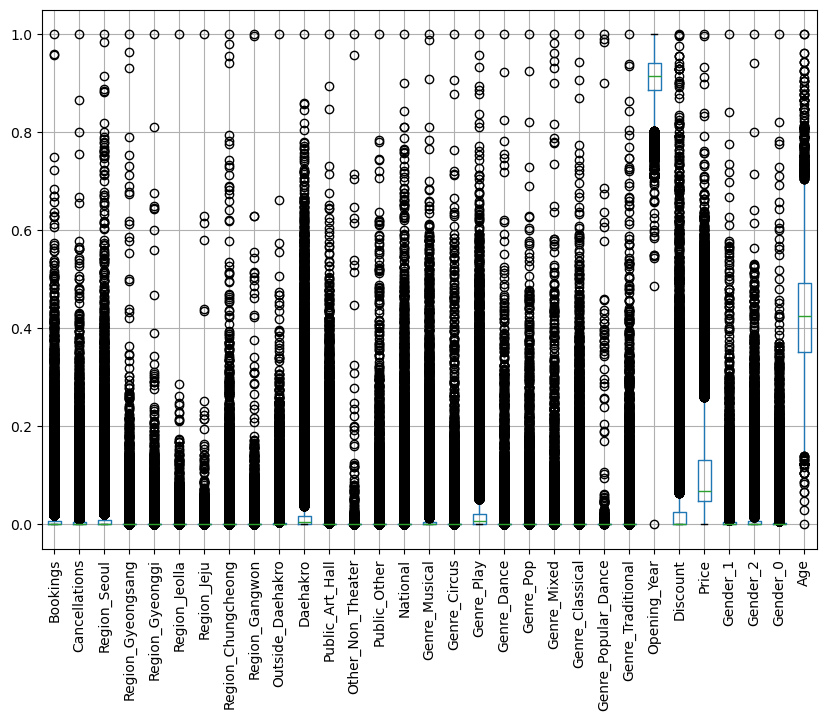

In [71]:
fig = plt.figure(figsize =(10, 7))
boxplot = df_s.boxplot(column = list(df_s.columns))
plt.xticks(rotation=90)
plt.show()

### ScatterPlot

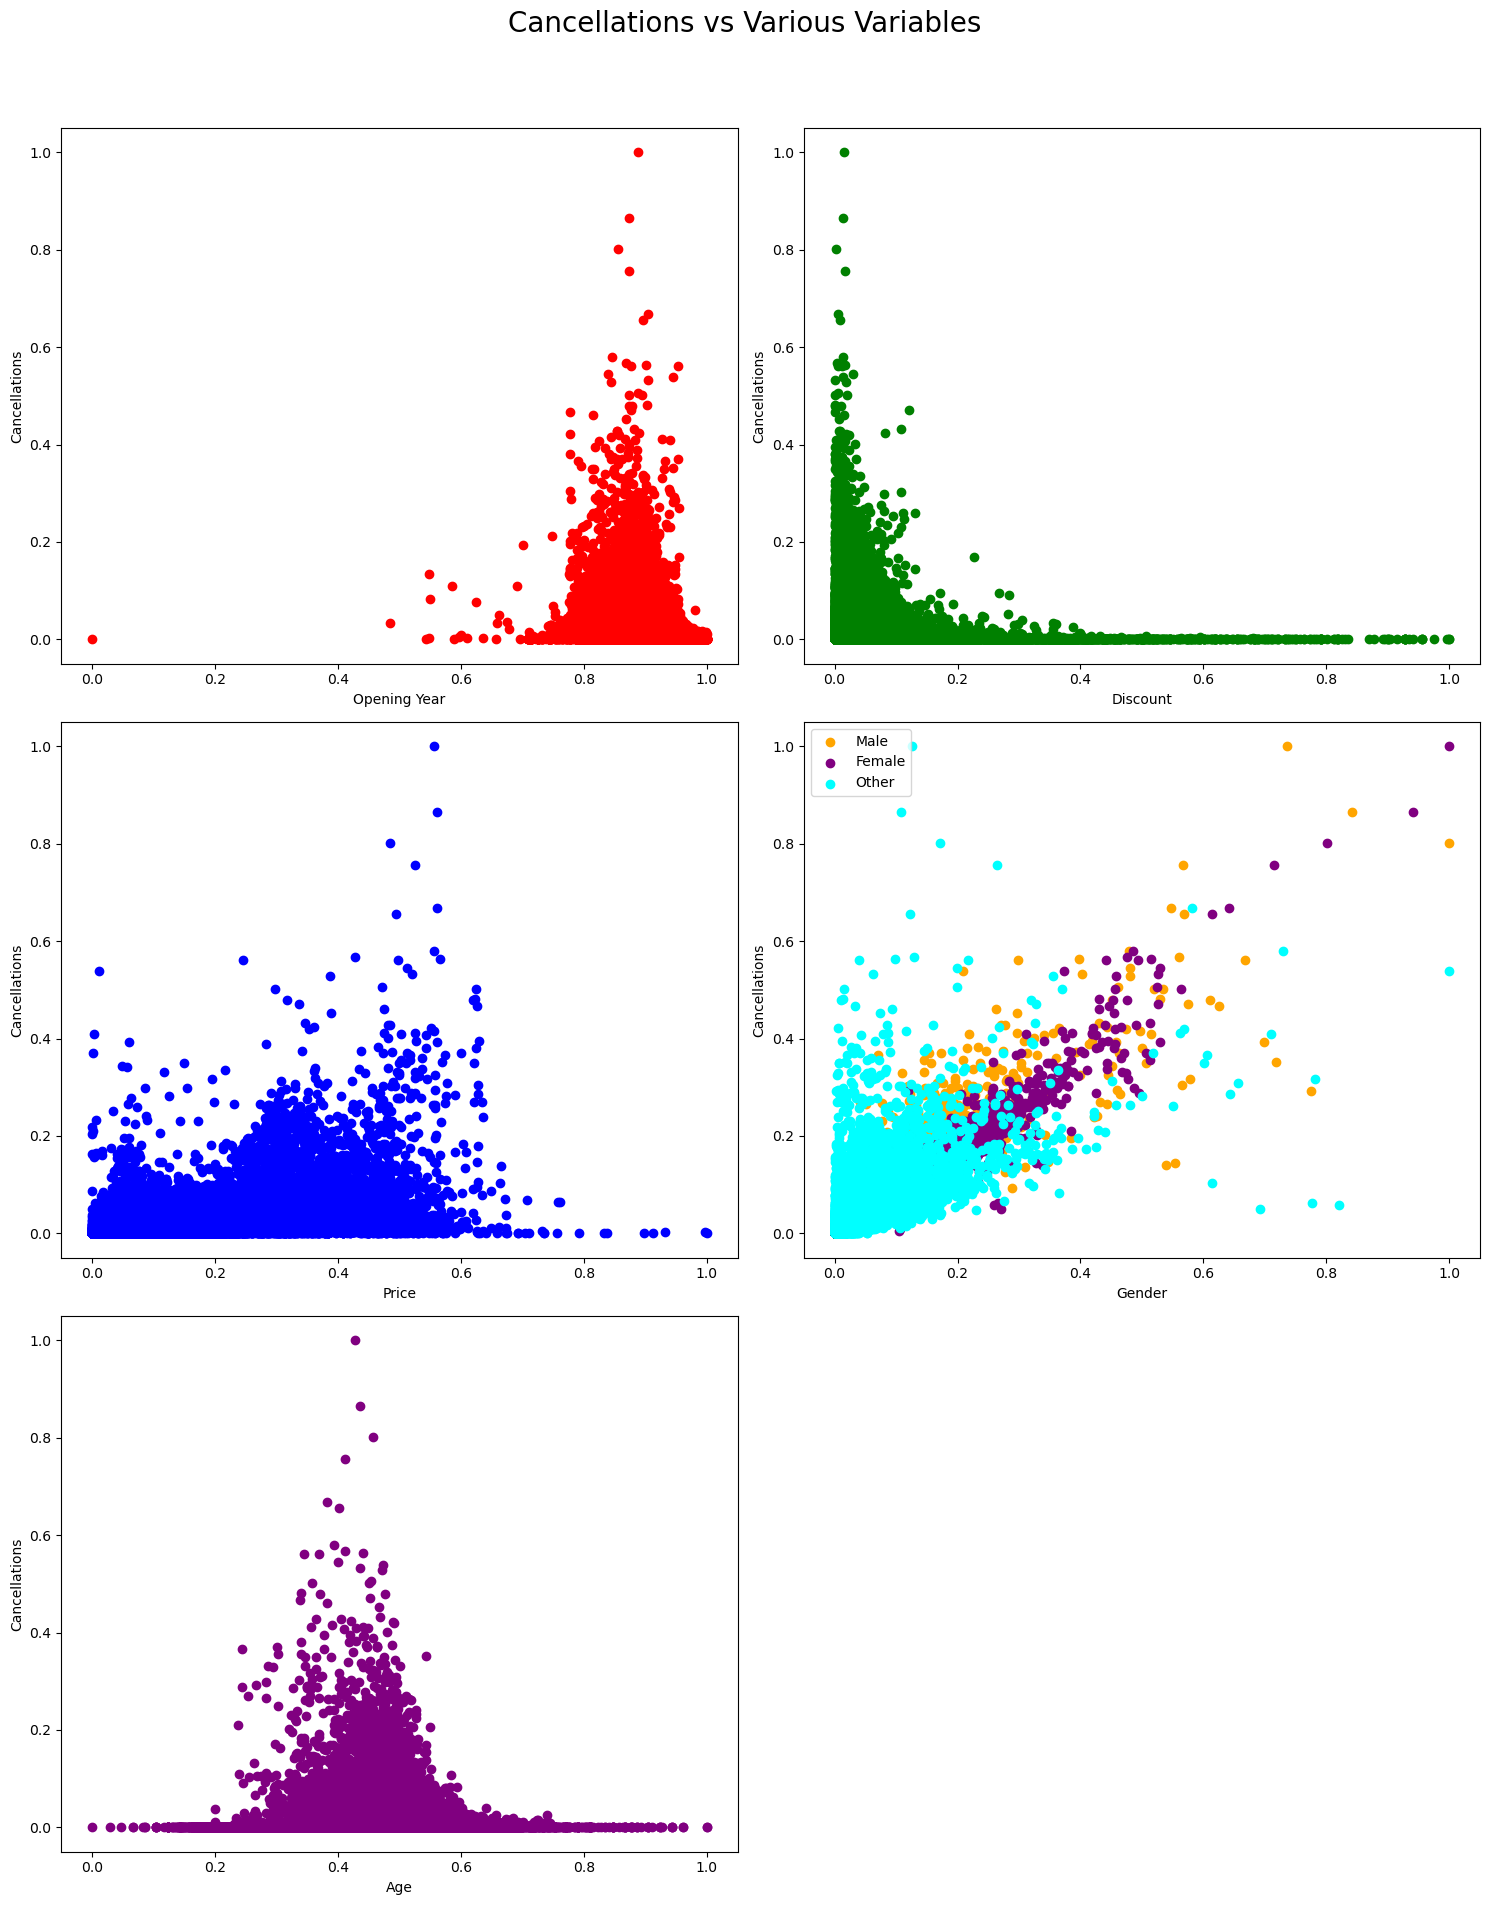

In [73]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Cancellations vs Various Variables', fontsize=20)

# Plot 1: Cancellations vs. Opening Year
axs[0, 0].scatter(df_s["Opening_Year"], df_s["Cancellations"], c="red")
axs[0, 0].set(xlabel='Opening Year', ylabel='Cancellations')

# Plot 2: Cancellations vs. Discount
axs[0, 1].scatter(df_s["Discount"], df_s["Cancellations"], c="green")
axs[0, 1].set(xlabel='Discount', ylabel='Cancellations')

# Plot 3: Cancellations vs. Price
axs[1, 0].scatter(df_s["Price"], df_s["Cancellations"], c="blue")
axs[1, 0].set(xlabel='Price', ylabel='Cancellations')

# Plot 4: Cancellations vs. Gender
axs[1, 1].scatter(df_s["Gender_1"], df_s["Cancellations"], c="orange", label='Male')
axs[1, 1].scatter(df_s["Gender_2"], df_s["Cancellations"], c="purple", label='Female')
axs[1, 1].scatter(df_s["Gender_0"], df_s["Cancellations"], c="cyan", label='Other')
axs[1, 1].set(xlabel='Gender', ylabel='Cancellations')
axs[1, 1].legend()

# Plot 5: Cancellations vs. Age
axs[2, 0].scatter(df_s["Age"], df_s["Cancellations"], c="purple")
axs[2, 0].set(xlabel='Age', ylabel='Cancellations')

# Remove empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Corrlation

In [74]:
corrMatrix = df_s.corr()
print (corrMatrix)

                     Bookings  Cancellations  Region_Seoul  Region_Gyeongsang  \
Bookings             1.000000       0.969799      0.917732           0.680032   
Cancellations        0.969799       1.000000      0.911146           0.685625   
Region_Seoul         0.917732       0.911146      1.000000           0.438709   
Region_Gyeongsang    0.680032       0.685625      0.438709           1.000000   
Region_Gyeonggi      0.587415       0.554390      0.368801           0.334680   
Region_Jeolla        0.453856       0.443833      0.314474           0.303704   
Region_Jeju          0.174002       0.156294      0.127749           0.088961   
Region_Chungcheong   0.578416       0.534828      0.433988           0.403960   
Region_Gangwon       0.283879       0.269085      0.208672           0.173961   
Outside_Daehakro     0.834765       0.847539      0.784271           0.590416   
Daehakro             0.583495       0.592715      0.645537           0.263070   
Public_Art_Hall      0.77715

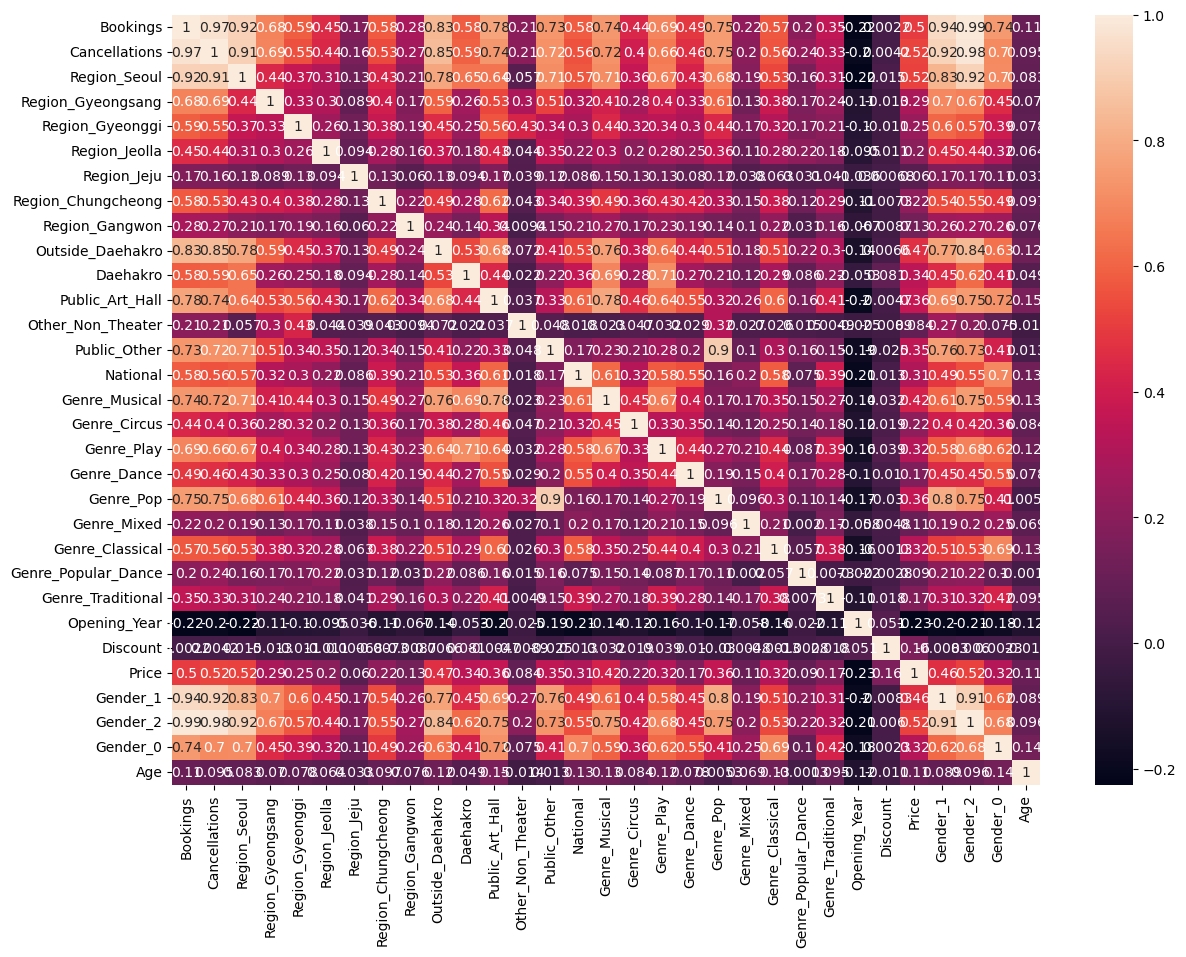

In [75]:
fig = plt.figure(figsize =(14, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Regression

In [82]:
from sklearn.model_selection import train_test_split

X = df_s.drop(columns=['Cancellations', 'Bookings'])
y = df_s['Cancellations']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (26629, 29) (26629,)
Test Data :  (6658, 29) (6658,)


In [83]:
%%time

from sklearn.linear_model import LinearRegression

# Linear Regression 모델 생성
MR = LinearRegression(n_jobs=-1)

# 모델 학습
MR.fit(X_train, y_train)

CPU times: user 91 ms, sys: 9.22 ms, total: 100 ms
Wall time: 27.9 ms


LinearRegression(n_jobs=-1)

In [84]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, MR.predict(X_test)))

0.00569123916808358

In [85]:
from sklearn.metrics import r2_score

r2_score(y_test, MR.predict(X_test))

0.9803191040189525

## 다시

In [3]:
# 폴더 경로 설정
folder_path = "/Users/myungjunlee/Desktop/repository/Kopis"

# 폴더 내 모든 CSV 파일 불러오기
all_files = glob.glob(f"{folder_path}/**/*.csv", recursive=True)

include_columns = ['공연코드', '공연일시', '예매/취소구분']

def read_csv_file(file_path):
    df = dd.read_csv(file_path, usecols=include_columns)
    return df

start_time = time.time()

# 모든 파일의 데이터를 읽어서 하나의 Dask DataFrame으로 결합
dfs_s = [read_csv_file(file) for file in all_files]
dask_df = dd.concat(dfs_s)

# 결과 확인 (예시로 첫 번째 데이터프레임 출력)
print(dask_df.head(1))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to process {elapsed_time:.2f} seconds")

       공연코드              공연일시  예매/취소구분
0  PF307520  2023-12-25 10:30        1
Time taken to process 212.09 seconds


In [4]:
df_a = dask_df.compute()
df_a.head()
del dask_df

In [7]:
df_a['공연일시'] = pd.to_datetime(df_a['공연일시'])

df_a['Year'] = df_a['공연일시'].dt.year
df_a['Month'] = df_a['공연일시'].dt.month
df_a['Day'] = df_a['공연일시'].dt.day
df_a['Hour'] = df_a['공연일시'].dt.hour
df_a['Minute'] = df_a['공연일시'].dt.minute
df_a['Weekday'] = df_a['공연일시'].dt.weekday

df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137552442 entries, 0 to 99030
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   공연코드     object        
 1   공연일시     datetime64[ns]
 2   예매/취소구분  int64         
 3   Year     int32         
 4   Month    int32         
 5   Day      int32         
 6   Hour     int32         
 7   Minute   int32         
 8   Weekday  int32         
dtypes: datetime64[ns](1), int32(6), int64(1), object(1)
memory usage: 7.2+ GB


In [8]:
df_a.drop(columns = ['공연일시'], axis = 1, inplace =True)

In [10]:
df_g = df_a.groupby(['공연코드', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday']).agg(
    Bookings=('예매/취소구분', lambda x: (x == 1).sum()),
    Cancellations=('예매/취소구분', lambda x: (x == 2).sum())
).reset_index()

df_g.head(10)

공연코드  Year  Month  Day  Hour  Minute  Weekday  Bookings  Cancellations
0  PF300000  2022      6    3    16       0        4       311             47
1  PF300000  2022      6    4    11       0        5       534            155
2  PF300000  2022      6    4    14       0        5       525            128
3  PF300000  2022      6    5    11       0        6       465            149
4  PF300000  2022      6    5    14       0        6       521            156
5  PF300001  2022      4   26    20       0        1       247            129
6  PF300001  2022      4   27    20       0        2       205            127
7  PF300001  2022      4   28    20       0        3       140            140
8  PF300001  2022      4   29    20       0        4       225            126
9  PF300001  2022      4   30    15       0        5       243            161

In [11]:
df_g = df_g.rename(columns={'공연코드':'code'})

In [14]:
df_g.value_counts('code')

code
PF343804    4990
PF352013    3587
PF392163    3422
PF394750    3295
PF356520    2650
            ... 
PF386885       1
PF386890       1
PF386891       1
PF386893       1
PF456658       1
Name: count, Length: 65504, dtype: int64

In [15]:
df_343804 = df_g[df_g['code'] == 'PF343804']
df_343804 = df_343804.drop(columns=['code']).reset_index(drop=True)
df_343804.head()

### Data Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [20]:
df_s = mms.fit_transform(df_343804) 
df_s = pd.DataFrame(df_s, columns=df_343804.columns)
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4990 non-null   float64
 1   Month          4990 non-null   float64
 2   Day            4990 non-null   float64
 3   Hour           4990 non-null   float64
 4   Minute         4990 non-null   float64
 5   Weekday        4990 non-null   float64
 6   Bookings       4990 non-null   float64
 7   Cancellations  4990 non-null   float64
dtypes: float64(8)
memory usage: 312.0 KB


### Box Plot

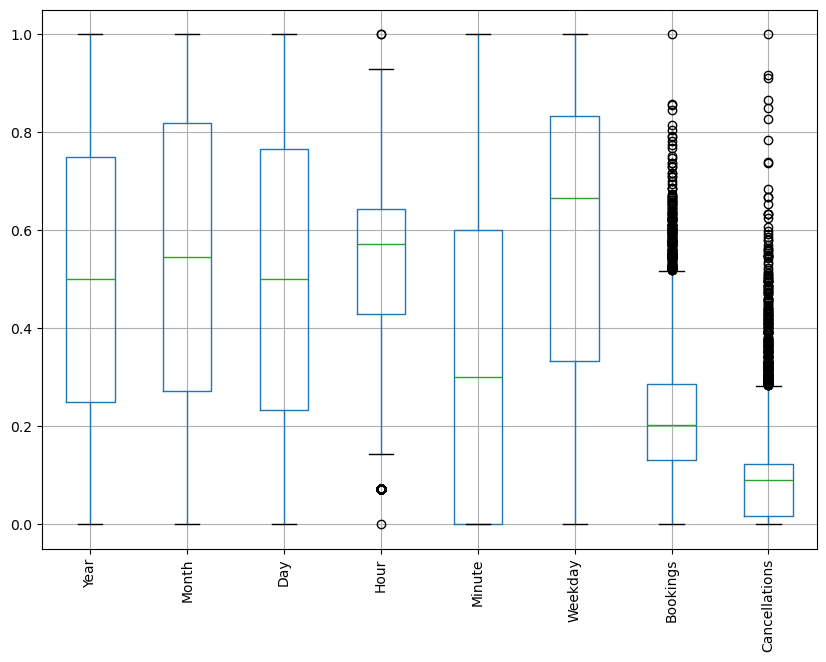

In [21]:
fig = plt.figure(figsize =(10, 7))
boxplot = df_s.boxplot(column = list(df_s.columns))
plt.xticks(rotation=90)
plt.show()

## ScatterPlot

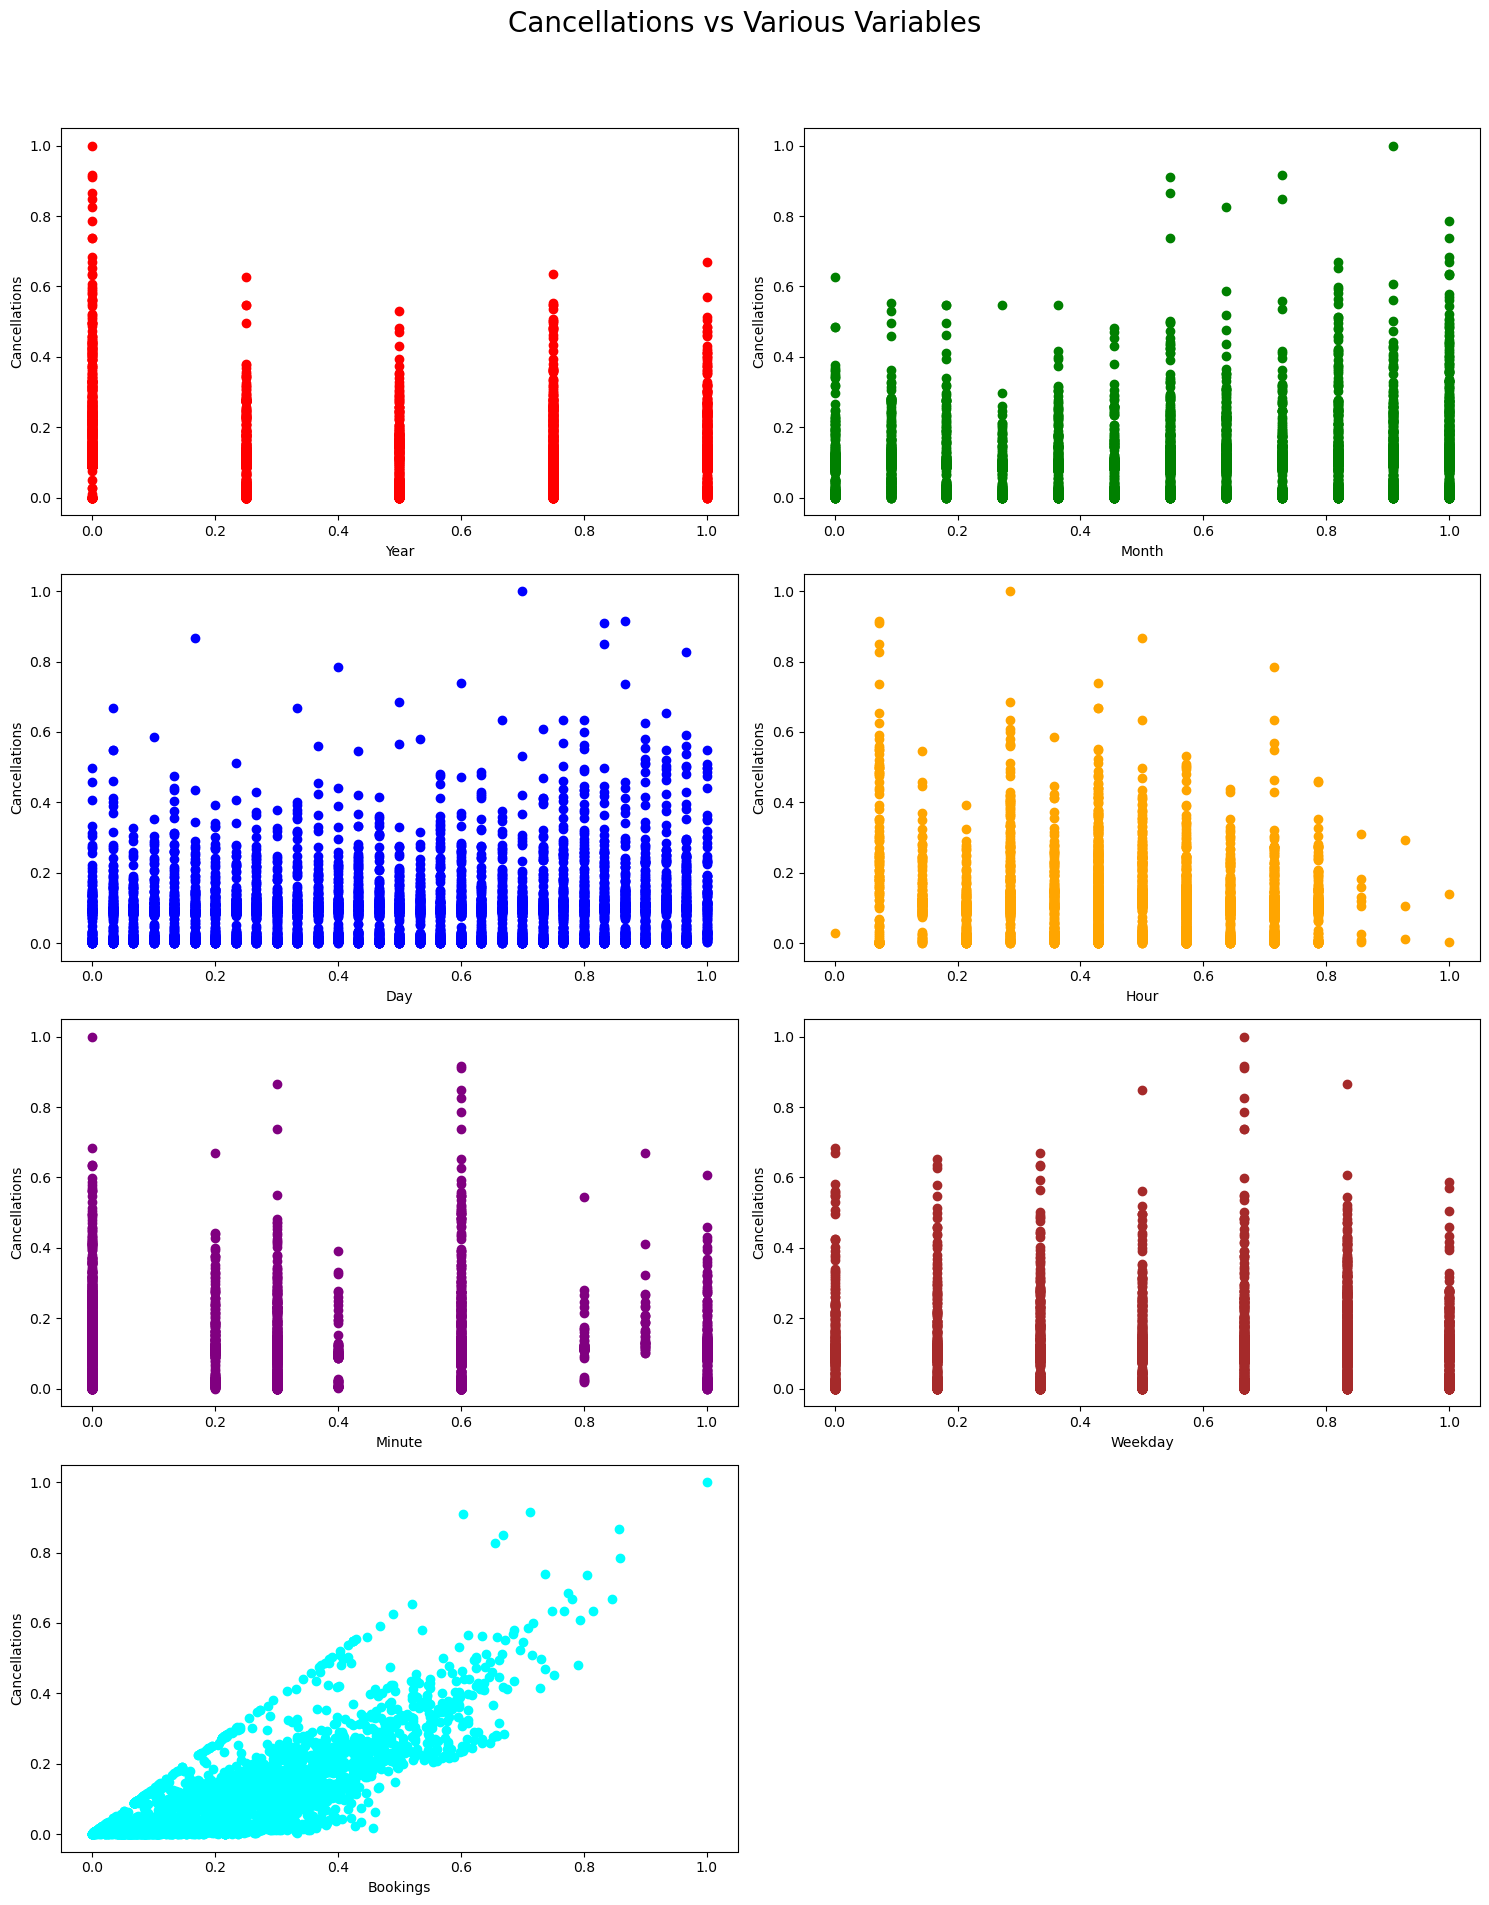

In [22]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Cancellations vs Various Variables', fontsize=20)

# Plot 1: Cancellations vs. Year
axs[0, 0].scatter(df_s["Year"], df_s["Cancellations"], c="red")
axs[0, 0].set(xlabel='Year', ylabel='Cancellations')

# Plot 2: Cancellations vs. Month
axs[0, 1].scatter(df_s["Month"], df_s["Cancellations"], c="green")
axs[0, 1].set(xlabel='Month', ylabel='Cancellations')

# Plot 3: Cancellations vs. Day
axs[1, 0].scatter(df_s["Day"], df_s["Cancellations"], c="blue")
axs[1, 0].set(xlabel='Day', ylabel='Cancellations')

# Plot 4: Cancellations vs. Hour
axs[1, 1].scatter(df_s["Hour"], df_s["Cancellations"], c="orange")
axs[1, 1].set(xlabel='Hour', ylabel='Cancellations')

# Plot 5: Cancellations vs. Minute
axs[2, 0].scatter(df_s["Minute"], df_s["Cancellations"], c="purple")
axs[2, 0].set(xlabel='Minute', ylabel='Cancellations')

# Plot 6: Cancellations vs. Weekday
axs[2, 1].scatter(df_s["Weekday"], df_s["Cancellations"], c="brown")
axs[2, 1].set(xlabel='Weekday', ylabel='Cancellations')

# Plot 7: Cancellations vs. Bookings
axs[3, 0].scatter(df_s["Bookings"], df_s["Cancellations"], c="cyan")
axs[3, 0].set(xlabel='Bookings', ylabel='Cancellations')

# Remove empty subplot
fig.delaxes(axs[3, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Corrlation

In [23]:
corrMatrix = df_s.corr()
print (corrMatrix)

                   Year     Month       Day      Hour    Minute   Weekday  \
Year           1.000000 -0.206885 -0.011045 -0.006917 -0.057660  0.040609   
Month         -0.206885  1.000000  0.027240  0.004525  0.012855 -0.010866   
Day           -0.011045  0.027240  1.000000 -0.073716  0.027606 -0.022411   
Hour          -0.006917  0.004525 -0.073716  1.000000 -0.076904 -0.066543   
Minute        -0.057660  0.012855  0.027606 -0.076904  1.000000  0.221503   
Weekday        0.040609 -0.010866 -0.022411 -0.066543  0.221503  1.000000   
Bookings       0.003028  0.101920  0.052705 -0.145092 -0.110865  0.141296   
Cancellations -0.095464  0.126149  0.109245 -0.189111 -0.019128  0.018837   

               Bookings  Cancellations  
Year           0.003028      -0.095464  
Month          0.101920       0.126149  
Day            0.052705       0.109245  
Hour          -0.145092      -0.189111  
Minute        -0.110865      -0.019128  
Weekday        0.141296       0.018837  
Bookings       1.00

In [24]:
fig = plt.figure(figsize =(14, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Regression

In [25]:
from sklearn.model_selection import train_test_split

X = df_s.drop(columns=['Cancellations', 'Bookings'])
y = df_s['Cancellations']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (3992, 6) (3992,)
Test Data :  (998, 6) (998,)


In [26]:
%%time

from sklearn.linear_model import LinearRegression

# Linear Regression 모델 생성
LR = LinearRegression(n_jobs=-1)

# 모델 학습
LR.fit(X_train, y_train)

CPU times: user 40.2 ms, sys: 15.7 ms, total: 55.8 ms
Wall time: 73 ms


LinearRegression(n_jobs=-1)

In [27]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, LR.predict(X_test)))

0.09443353556845555

In [28]:
from sklearn.metrics import r2_score

r2_score(y_test, LR.predict(X_test))

0.07114778135193822

### Log Transformation

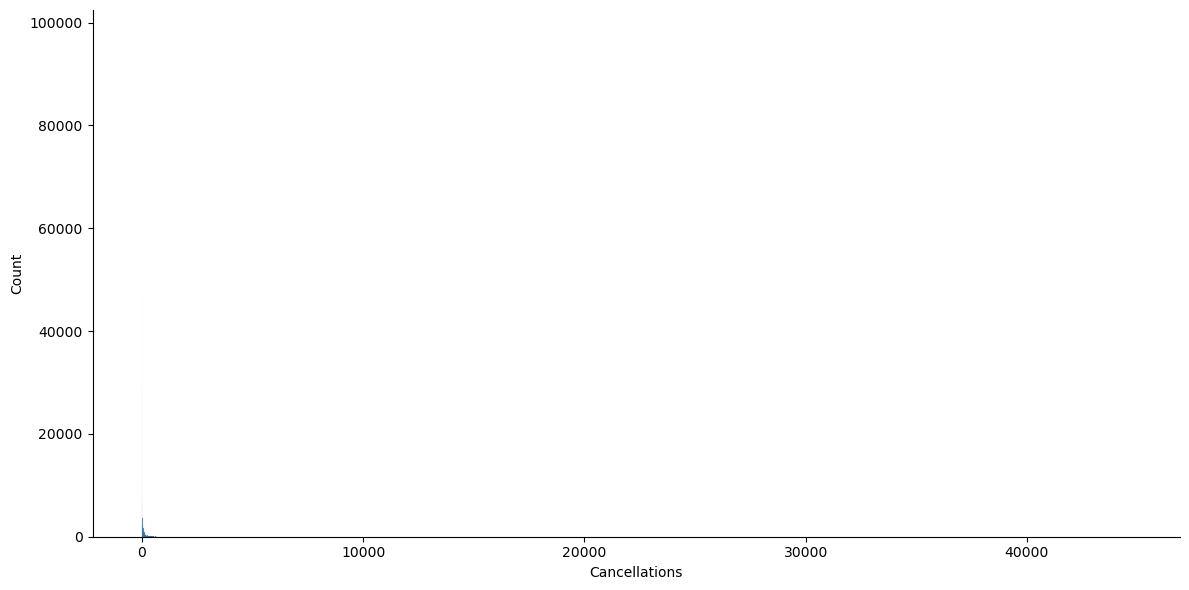

In [32]:
sns.displot(df_g['Cancellations'], height = 6, aspect = 2)
plt.show()

In [33]:
sns.displot(np.log(df_g['Cancellations']), height = 6, aspect = 2)
plt.show()

/opt/homebrew/anaconda3/envs/gpu/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
df_l = df_g.copy()
df_l.head()

code  Year  Month  Day  Hour  Minute  Weekday  Bookings  Cancellations
0  PF300000  2022      6    3    16       0        4       311             47
1  PF300000  2022      6    4    11       0        5       534            155
2  PF300000  2022      6    4    14       0        5       525            128
3  PF300000  2022      6    5    11       0        6       465            149
4  PF300000  2022      6    5    14       0        6       521            156

In [49]:
columns_to_log = ['Cancellations', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday']

for col in columns_to_log:
    df_l[col] = np.log(df_l[col])

df_l.head()

/opt/homebrew/anaconda3/envs/gpu/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


code      Year     Month       Day      Hour  Minute   Weekday  \
0  PF300000  7.611842  1.791759  1.098612  2.772589    -inf  1.386294   
1  PF300000  7.611842  1.791759  1.386294  2.397895    -inf  1.609438   
2  PF300000  7.611842  1.791759  1.386294  2.639057    -inf  1.609438   
3  PF300000  7.611842  1.791759  1.609438  2.397895    -inf  1.791759   
4  PF300000  7.611842  1.791759  1.609438  2.639057    -inf  1.791759   

   Bookings  Cancellations  
0       311       3.850148  
1       534       5.043425  
2       525       4.852030  
3       465       5.003946  
4       521       5.049856

In [50]:
df_l.replace(-np.inf, 0, inplace=True)
df_l.head()

code      Year     Month       Day      Hour  Minute   Weekday  \
0  PF300000  7.611842  1.791759  1.098612  2.772589     0.0  1.386294   
1  PF300000  7.611842  1.791759  1.386294  2.397895     0.0  1.609438   
2  PF300000  7.611842  1.791759  1.386294  2.639057     0.0  1.609438   
3  PF300000  7.611842  1.791759  1.609438  2.397895     0.0  1.791759   
4  PF300000  7.611842  1.791759  1.609438  2.639057     0.0  1.791759   

   Bookings  Cancellations  
0       311       3.850148  
1       534       5.043425  
2       525       4.852030  
3       465       5.003946  
4       521       5.049856

### Regression

In [51]:
df_343804_l = df_l[df_l['code'] == 'PF343804']
df_343804_l = df_343804_l.drop(columns=['code']).reset_index(drop=True)
df_343804_l.head()

Year    Month       Day      Hour    Minute  Weekday  Bookings  \
0  7.610358  1.94591  0.000000  2.564949  0.000000      0.0       120   
1  7.610358  1.94591  0.000000  2.708050  2.708050      0.0       171   
2  7.610358  1.94591  0.000000  2.833213  3.401197      0.0       152   
3  7.610358  1.94591  0.000000  2.995732  0.000000      0.0       185   
4  7.610358  1.94591  0.693147  2.564949  0.000000      0.0       291   

   Cancellations  
0       4.248495  
1       4.276666  
2       4.262680  
3       4.564348  
4       5.159055

In [52]:
from sklearn.model_selection import train_test_split

X = df_343804_l.drop(columns=['Cancellations', 'Bookings'])
y = df_343804_l['Cancellations']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (3992, 6) (3992,)
Test Data :  (998, 6) (998,)


In [53]:
%%time

from sklearn.linear_model import LinearRegression

# Linear Regression 모델 생성
LR_l = LinearRegression(n_jobs=-1)

# 모델 학습
LR_l.fit(X_train, y_train)

CPU times: user 4.53 ms, sys: 3.74 ms, total: 8.27 ms
Wall time: 6.65 ms


LinearRegression(n_jobs=-1)

In [55]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, LR_l.predict(X_test)))

1.4008900720219504

In [56]:
from sklearn.metrics import r2_score

r2_score(y_test, LR_l.predict(X_test))

0.027590084972875073

In [57]:
# 메모리 보존
%reset -f

### 다시

In [87]:
import os
import dask.dataframe as dd
import time
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from scipy import stats
import matplotlib.pyplot as plt

In [88]:
# 폴더 경로 설정
folder_path = "/Users/myungjunlee/Desktop/repository/Kopis"

# 폴더 내 모든 CSV 파일 불러오기
all_files = glob.glob(f"{folder_path}/**/*.csv", recursive=True)

include_columns = ['공연코드', '공연일시', '예매/취소구분', '주소', '전송사업자명', '할인금액', '장당금액', '성별', '연령']

def read_csv_file(file_path):
    df = dd.read_csv(file_path, usecols=include_columns)
    return df

start_time = time.time()

# 모든 파일의 데이터를 읽어서 하나의 Dask DataFrame으로 결합
dfs_s = [read_csv_file(file) for file in all_files]
dask_df = dd.concat(dfs_s)

# 결과 확인 (예시로 첫 번째 데이터프레임 출력)
print(dask_df.head(1))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to process {elapsed_time:.2f} seconds")

   전송사업자명                                 주소      공연코드              공연일시  \
0  네이버N예약  서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층  PF307520  2023-12-25 10:30   

   예매/취소구분   할인금액   장당금액  성별    연령  
0        1  24500  50000   1  1981  
Time taken to process 275.06 seconds


In [89]:
df_a = dask_df.compute()
df_a.head()
del dask_df

In [90]:
df_a['공연일시'] = pd.to_datetime(df_a['공연일시'])

df_a['Year'] = df_a['공연일시'].dt.year
df_a['Month'] = df_a['공연일시'].dt.month
df_a['Day'] = df_a['공연일시'].dt.day
df_a['Hour'] = df_a['공연일시'].dt.hour
df_a['Minute'] = df_a['공연일시'].dt.minute
df_a['Weekday'] = df_a['공연일시'].dt.weekday

df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137552442 entries, 0 to 99030
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   전송사업자명   object        
 1   주소       object        
 2   공연코드     object        
 3   공연일시     datetime64[ns]
 4   예매/취소구분  int64         
 5   할인금액     int64         
 6   장당금액     int64         
 7   성별       int64         
 8   연령       int64         
 9   Year     int32         
 10  Month    int32         
 11  Day      int32         
 12  Hour     int32         
 13  Minute   int32         
 14  Weekday  int32         
dtypes: datetime64[ns](1), int32(6), int64(5), object(3)
memory usage: 13.3+ GB


In [91]:
df_343804_b = df_a[df_a['공연코드'] == 'PF343804']
df_343804_b = df_343804_b.drop(columns=['공연코드']).reset_index(drop=True)
df_343804_b.head()

전송사업자명                               주소                공연일시  예매/취소구분   할인금액  \
0   타임티켓  서울특별시 종로구 대학로10길 24 (동숭동) 지하 1층 2023-12-25 11:45:00        1  20000   
1   타임티켓  서울특별시 종로구 대학로10길 24 (동숭동) 지하 1층 2023-12-25 11:45:00        1  20000   
2   타임티켓  서울특별시 종로구 대학로10길 24 (동숭동) 지하 1층 2023-12-25 11:45:00        1  20000   
3   타임티켓  서울특별시 종로구 대학로10길 24 (동숭동) 지하 1층 2023-12-25 11:45:00        1  20000   
4   타임티켓  서울특별시 종로구 대학로10길 24 (동숭동) 지하 1층 2023-12-25 11:45:00        1  20000   

    장당금액  성별  연령  Year  Month  Day  Hour  Minute  Weekday  
0  40000   0   0  2023     12   25    11      45        0  
1  40000   0   0  2023     12   25    11      45        0  
2  40000   0   0  2023     12   25    11      45        0  
3  40000   0   0  2023     12   25    11      45        0  
4  40000   0   0  2023     12   25    11      45        0

In [92]:
del df_a

In [93]:
df_343804_b['전송사업자명'].unique()

array(['타임티켓', '네이버N예약', '인터파크', '쿠팡', '티몬', '위메프', '예스24', '클립서비스',
       '11번가', '대학로티켓닷컴', '페이북', '옥션', 'SK플래닛', '하나투어'], dtype=object)

In [94]:
df_343804_b['주소'].unique()

array(['서울특별시 종로구 대학로10길 24 (동숭동) 지하 1층'], dtype=object)

In [95]:
df_343804_b.drop(columns = ['주소'], inplace=True)
df_343804_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374812 entries, 0 to 1374811
Data columns (total 13 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   전송사업자명   1374812 non-null  object        
 1   공연일시     1374812 non-null  datetime64[ns]
 2   예매/취소구분  1374812 non-null  int64         
 3   할인금액     1374812 non-null  int64         
 4   장당금액     1374812 non-null  int64         
 5   성별       1374812 non-null  int64         
 6   연령       1374812 non-null  int64         
 7   Year     1374812 non-null  int32         
 8   Month    1374812 non-null  int32         
 9   Day      1374812 non-null  int32         
 10  Hour     1374812 non-null  int32         
 11  Minute   1374812 non-null  int32         
 12  Weekday  1374812 non-null  int32         
dtypes: datetime64[ns](1), int32(6), int64(5), object(1)
memory usage: 104.9+ MB


In [96]:
df_343804_b.drop(columns = ['공연일시'], inplace=True)
df_343804_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374812 entries, 0 to 1374811
Data columns (total 12 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   전송사업자명   1374812 non-null  object
 1   예매/취소구분  1374812 non-null  int64 
 2   할인금액     1374812 non-null  int64 
 3   장당금액     1374812 non-null  int64 
 4   성별       1374812 non-null  int64 
 5   연령       1374812 non-null  int64 
 6   Year     1374812 non-null  int32 
 7   Month    1374812 non-null  int32 
 8   Day      1374812 non-null  int32 
 9   Hour     1374812 non-null  int32 
 10  Minute   1374812 non-null  int32 
 11  Weekday  1374812 non-null  int32 
dtypes: int32(6), int64(5), object(1)
memory usage: 94.4+ MB


In [97]:
current_year = 2024

df_343804_b['연령'] = pd.to_numeric(df_343804_b['연령'], errors='coerce')
df_343804_b['Age'] = current_year - df_343804_b['연령']
df_343804_b = df_343804_b[(df_343804_b['Age'] >= 1) & (df_343804_b['Age'] <= 100)]
df_343804_b = df_343804_b.dropna(subset=['Age'])
df_343804_b = df_343804_b.drop(columns=['연령'])

df_343804_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379250 entries, 48 to 1374797
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   전송사업자명   379250 non-null  object
 1   예매/취소구분  379250 non-null  int64 
 2   할인금액     379250 non-null  int64 
 3   장당금액     379250 non-null  int64 
 4   성별       379250 non-null  int64 
 5   Year     379250 non-null  int32 
 6   Month    379250 non-null  int32 
 7   Day      379250 non-null  int32 
 8   Hour     379250 non-null  int32 
 9   Minute   379250 non-null  int32 
 10  Weekday  379250 non-null  int32 
 11  Age      379250 non-null  int64 
dtypes: int32(6), int64(5), object(1)
memory usage: 28.9+ MB


In [86]:
# def iqr(series):
#     q1 = series.quantile(0.25)
#     q3 = series.quantile(0.75)
#     iqr = q3 - q1
#     lb = max(q1 - 1.5 * iqr, 0)
#     ub = q3 + 1.5 * iqr
#     return lb, ub

# d_n_z = df_343804_b['할인금액'][df_343804_b['할인금액'] > 0]

# d_l, d_u = iqr(d_n_z)
# p_l, p_u = iqr(df_343804_b['장당금액'])
# a_l, a_u = iqr(df_343804_b['Age'])

# print(d_l, d_u, p_l, p_u, a_l, a_u)

13450.0 32250.0 35000.0 35000.0 0 63.0


In [77]:
# df_343804_b = df_343804_b[
#     (df_343804_b['할인금액'] >= d_l) & (df_343804_b['할인금액'] <= d_u) &
#     (df_343804_b['장당금액'] >= p_l) & (df_343804_b['장당금액'] <= p_u) &
#     (df_343804_b['Age'] >= a_l) & (df_343804_b['Age'] <= a_u)
# ].reset_index(drop=True)

# df_343804_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   전송사업자명   268 non-null    object
 1   예매/취소구분  268 non-null    int64 
 2   할인금액     268 non-null    int64 
 3   장당금액     268 non-null    int64 
 4   성별       268 non-null    int64 
 5   Year     268 non-null    int32 
 6   Month    268 non-null    int32 
 7   Day      268 non-null    int32 
 8   Hour     268 non-null    int32 
 9   Minute   268 non-null    int32 
 10  Weekday  268 non-null    int32 
 11  Age      268 non-null    int64 
dtypes: int32(6), int64(5), object(1)
memory usage: 19.0+ KB


In [98]:
df_g = df_343804_b.groupby(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday']).agg(
    Bookings=('예매/취소구분', lambda x: (x == 1).sum()),
    Cancellations=('예매/취소구분', lambda x: (x == 2).sum()),
    Avg_Discount=('할인금액', 'mean'),
    Avg_Price=('장당금액', 'mean'),
    Avg_Age=('Age', 'mean'),
    Gender_0_Count=('성별', lambda x: (x == 0).sum()),
    Gender_1_Count=('성별', lambda x: (x == 1).sum()),
    Gender_2_Count=('성별', lambda x: (x == 2).sum()),
    Vendor_TimeTicket=('전송사업자명', lambda x: (x == '타임티켓').sum()),
    Vendor_Naver=('전송사업자명', lambda x: (x == '네이버N예약').sum()),
    Vendor_Interpark=('전송사업자명', lambda x: (x == '인터파크').sum()),
    Vendor_Coupang=('전송사업자명', lambda x: (x == '쿠팡').sum()),
    Vendor_Tmon=('전송사업자명', lambda x: (x == '티몬').sum()),
    Vendor_Wemakeprice=('전송사업자명', lambda x: (x == '위메프').sum()),
    Vendor_Yes24=('전송사업자명', lambda x: (x == '예스24').sum()),
    Vendor_ClipService=('전송사업자명', lambda x: (x == '클립서비스').sum()),
    Vendor_11st=('전송사업자명', lambda x: (x == '11번가').sum()),
    Vendor_CollegeTicket=('전송사업자명', lambda x: (x == '대학로티켓닷컴').sum()),
    Vendor_Paybook=('전송사업자명', lambda x: (x == '페이북').sum()),
    Vendor_Auction=('전송사업자명', lambda x: (x == '옥션').sum()),
    Vendor_SKPlanet=('전송사업자명', lambda x: (x == 'SK플래닛').sum()),
    Vendor_HanaTour=('전송사업자명', lambda x: (x == '하나투어').sum())
).reset_index()

df_g.head(10)

Year  Month  Day  Hour  Minute  Weekday  Bookings  Cancellations  \
0  2019      7    1    13       0        0        53              6   
1  2019      7    1    15      15        0        78              7   
2  2019      7    1    17      30        0        74              8   
3  2019      7    1    20       0        0        53              8   
4  2019      7    2    13       0        1        54              0   
5  2019      7    2    15      15        1        59             10   
6  2019      7    2    17      30        1        61              8   
7  2019      7    2    20       0        1        31              4   
8  2019      7    3    13       0        2        43              2   
9  2019      7    3    15      15        2        55              6   

   Avg_Discount    Avg_Price  ...  Vendor_Tmon  Vendor_Wemakeprice  \
0           0.0  5084.745763  ...            0                   0   
1           0.0  6423.529412  ...            0                   0   
2           0.0  7682.926829  ...            0                   0   
3           0.0  8065.573770  ...            0                   0   
4           0.0  8666.666667  ...            0                   0   
5           0.0  7710.144928  ...            0                   0   
6           0.0  7304.347826  ...            0                   0   
7           0.0  8914.285714  ...            0                   0   
8           0.0  8577.777778  ...            0                   0   
9           0.0  8950.819672  ...            0                   0   

   Vendor_Yes24  Vendor_ClipService  Vendor_11st  Vendor_CollegeTicket  \
0             0                   0            0                     0   
1             0                   0            0                     0   
2             0                   0            0                     0   
3             0                   0            0                     0   
4             0                   0            0                     0   
5             0                   0            0                     0   
6             0                   0            0                     0   
7             0                   0            0                     0   
8             0                   0            0                     0   
9             0                   0            0                     0   

   Vendor_Paybook  Vendor_Auction  Vendor_SKPlanet  Vendor_HanaTour  
0               0               0                0                0  
1               0               0                0                0  
2               0               0                0                0  
3               0               0                0                0  
4               0               0                0                0  
5               0               0                0                0  
6               0               0                0                0  
7               0               0                0                0  
8               0               0                0                0  
9               0               0                0                0  

[10 rows x 28 columns]

In [99]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  4928 non-null   int32  
 1   Month                 4928 non-null   int32  
 2   Day                   4928 non-null   int32  
 3   Hour                  4928 non-null   int32  
 4   Minute                4928 non-null   int32  
 5   Weekday               4928 non-null   int32  
 6   Bookings              4928 non-null   int64  
 7   Cancellations         4928 non-null   int64  
 8   Avg_Discount          4928 non-null   float64
 9   Avg_Price             4928 non-null   float64
 10  Avg_Age               4928 non-null   float64
 11  Gender_0_Count        4928 non-null   int64  
 12  Gender_1_Count        4928 non-null   int64  
 13  Gender_2_Count        4928 non-null   int64  
 14  Vendor_TimeTicket     4928 non-null   int64  
 15  Vendor_Naver         

### Data Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [101]:
df_s = mms.fit_transform(df_g) 
df_s = pd.DataFrame(df_s, columns=df_g.columns)
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  4928 non-null   float64
 1   Month                 4928 non-null   float64
 2   Day                   4928 non-null   float64
 3   Hour                  4928 non-null   float64
 4   Minute                4928 non-null   float64
 5   Weekday               4928 non-null   float64
 6   Bookings              4928 non-null   float64
 7   Cancellations         4928 non-null   float64
 8   Avg_Discount          4928 non-null   float64
 9   Avg_Price             4928 non-null   float64
 10  Avg_Age               4928 non-null   float64
 11  Gender_0_Count        4928 non-null   float64
 12  Gender_1_Count        4928 non-null   float64
 13  Gender_2_Count        4928 non-null   float64
 14  Vendor_TimeTicket     4928 non-null   float64
 15  Vendor_Naver         

### Box Plot

In [102]:
fig = plt.figure(figsize =(10, 7))
boxplot = df_s.boxplot(column = list(df_s.columns))
plt.xticks(rotation=90)
plt.show()

### Scatter Plot

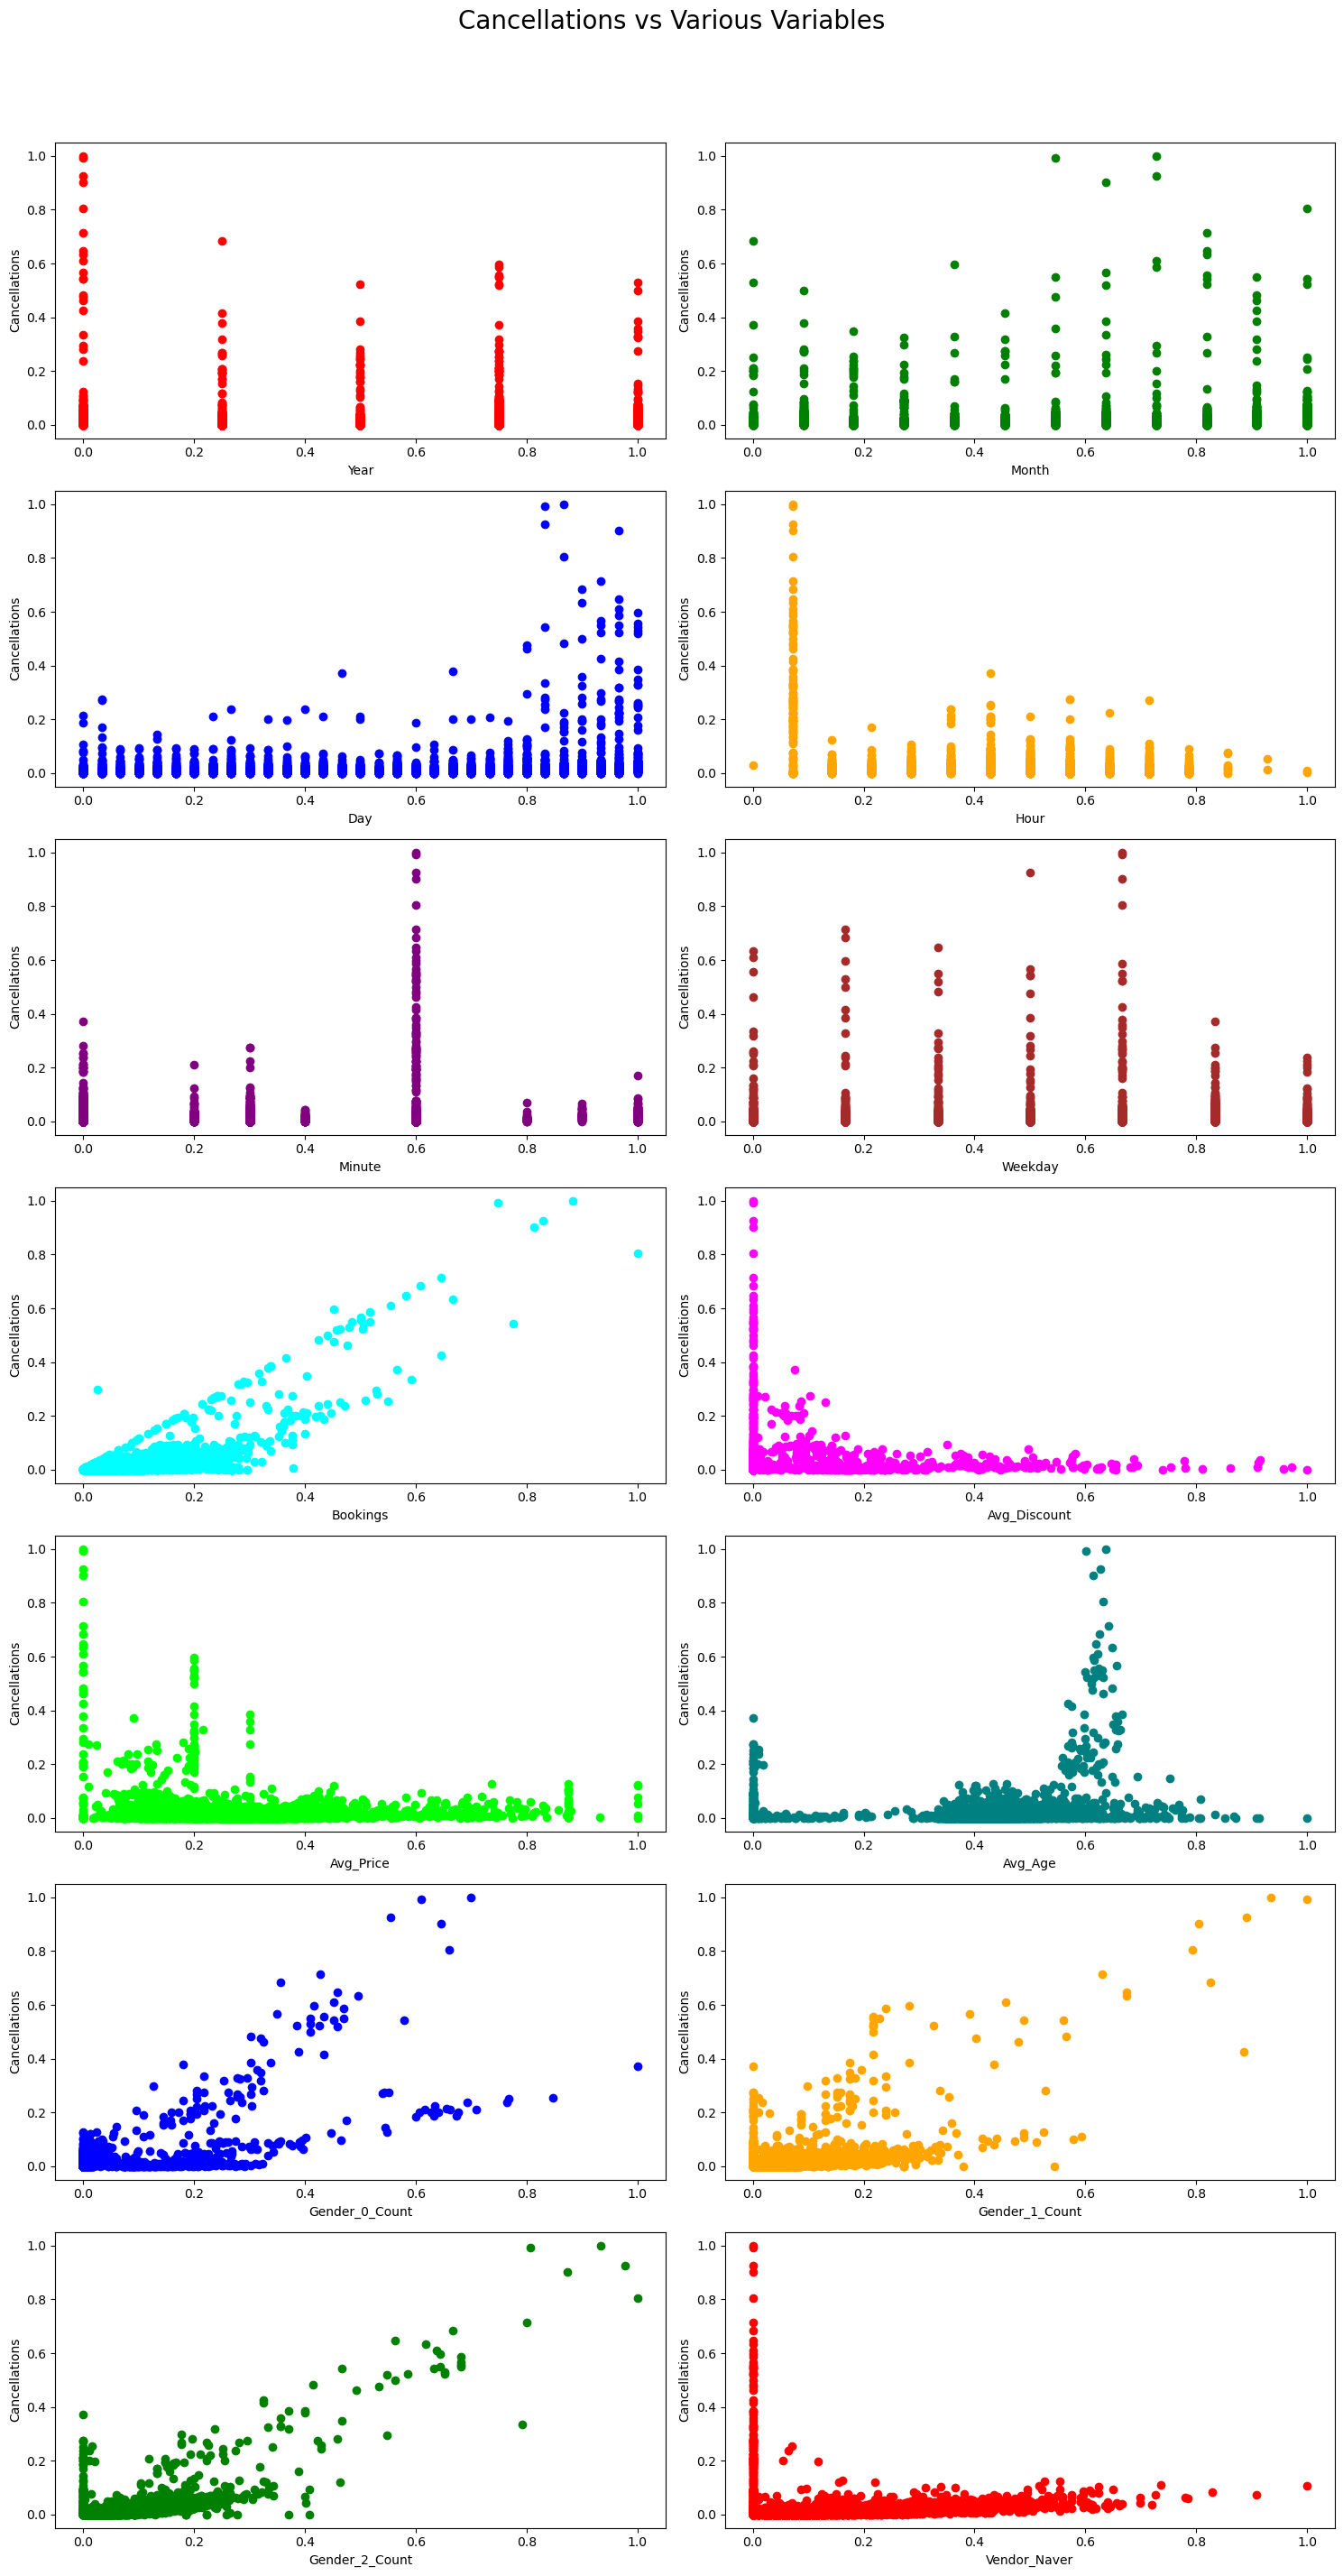

In [103]:
fig, axs = plt.subplots(7, 2, figsize=(15, 30))
fig.suptitle('Cancellations vs Various Variables', fontsize=20)

# Plot 1: Cancellations vs. Year
axs[0, 0].scatter(df_s["Year"], df_s["Cancellations"], c="red")
axs[0, 0].set(xlabel='Year', ylabel='Cancellations')

# Plot 2: Cancellations vs. Month
axs[0, 1].scatter(df_s["Month"], df_s["Cancellations"], c="green")
axs[0, 1].set(xlabel='Month', ylabel='Cancellations')

# Plot 3: Cancellations vs. Day
axs[1, 0].scatter(df_s["Day"], df_s["Cancellations"], c="blue")
axs[1, 0].set(xlabel='Day', ylabel='Cancellations')

# Plot 4: Cancellations vs. Hour
axs[1, 1].scatter(df_s["Hour"], df_s["Cancellations"], c="orange")
axs[1, 1].set(xlabel='Hour', ylabel='Cancellations')

# Plot 5: Cancellations vs. Minute
axs[2, 0].scatter(df_s["Minute"], df_s["Cancellations"], c="purple")
axs[2, 0].set(xlabel='Minute', ylabel='Cancellations')

# Plot 6: Cancellations vs. Weekday
axs[2, 1].scatter(df_s["Weekday"], df_s["Cancellations"], c="brown")
axs[2, 1].set(xlabel='Weekday', ylabel='Cancellations')

# Plot 7: Cancellations vs. Bookings
axs[3, 0].scatter(df_s["Bookings"], df_s["Cancellations"], c="cyan")
axs[3, 0].set(xlabel='Bookings', ylabel='Cancellations')

# Plot 8: Cancellations vs. Avg_Discount
axs[3, 1].scatter(df_s["Avg_Discount"], df_s["Cancellations"], c="magenta")
axs[3, 1].set(xlabel='Avg_Discount', ylabel='Cancellations')

# Plot 9: Cancellations vs. Avg_Price
axs[4, 0].scatter(df_s["Avg_Price"], df_s["Cancellations"], c="lime")
axs[4, 0].set(xlabel='Avg_Price', ylabel='Cancellations')

# Plot 10: Cancellations vs. Avg_Age
axs[4, 1].scatter(df_s["Avg_Age"], df_s["Cancellations"], c="teal")
axs[4, 1].set(xlabel='Avg_Age', ylabel='Cancellations')

# Plot 11: Cancellations vs. Gender_0_Count
axs[5, 0].scatter(df_s["Gender_0_Count"], df_s["Cancellations"], c="blue")
axs[5, 0].set(xlabel='Gender_0_Count', ylabel='Cancellations')

# Plot 12: Cancellations vs. Gender_1_Count
axs[5, 1].scatter(df_s["Gender_1_Count"], df_s["Cancellations"], c="orange")
axs[5, 1].set(xlabel='Gender_1_Count', ylabel='Cancellations')

# Plot 13: Cancellations vs. Gender_2_Count
axs[6, 0].scatter(df_s["Gender_2_Count"], df_s["Cancellations"], c="green")
axs[6, 0].set(xlabel='Gender_2_Count', ylabel='Cancellations')

# Plot 14: Cancellations vs. Vendor_TimeTicket (Example of a single vendor)
axs[6, 1].scatter(df_s["Vendor_Naver"], df_s["Cancellations"], c="red")
axs[6, 1].set(xlabel='Vendor_Naver', ylabel='Cancellations')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Corrlation

In [104]:
corrMatrix = df_s.corr()
print (corrMatrix)

                          Year     Month       Day      Hour    Minute  \
Year                  1.000000 -0.204341 -0.015167 -0.001820 -0.057961   
Month                -0.204341  1.000000  0.031757 -0.002641  0.010930   
Day                  -0.015167  0.031757  1.000000 -0.071259  0.027974   
Hour                 -0.001820 -0.002641 -0.071259  1.000000 -0.081954   
Minute               -0.057961  0.010930  0.027974 -0.081954  1.000000   
Weekday               0.039981 -0.011344 -0.022145 -0.067966  0.222811   
Bookings             -0.065237  0.003046  0.108254 -0.297476 -0.067280   
Cancellations        -0.036489  0.019606  0.172586 -0.298448  0.052220   
Avg_Discount          0.274053  0.043148  0.019009  0.009493 -0.084539   
Avg_Price             0.468490  0.265023  0.072091  0.029784 -0.067306   
Avg_Age              -0.301907  0.328808  0.102293 -0.200231  0.153569   
Gender_0_Count        0.031616 -0.206958  0.068664 -0.206912  0.005164   
Gender_1_Count       -0.153792  0.1649

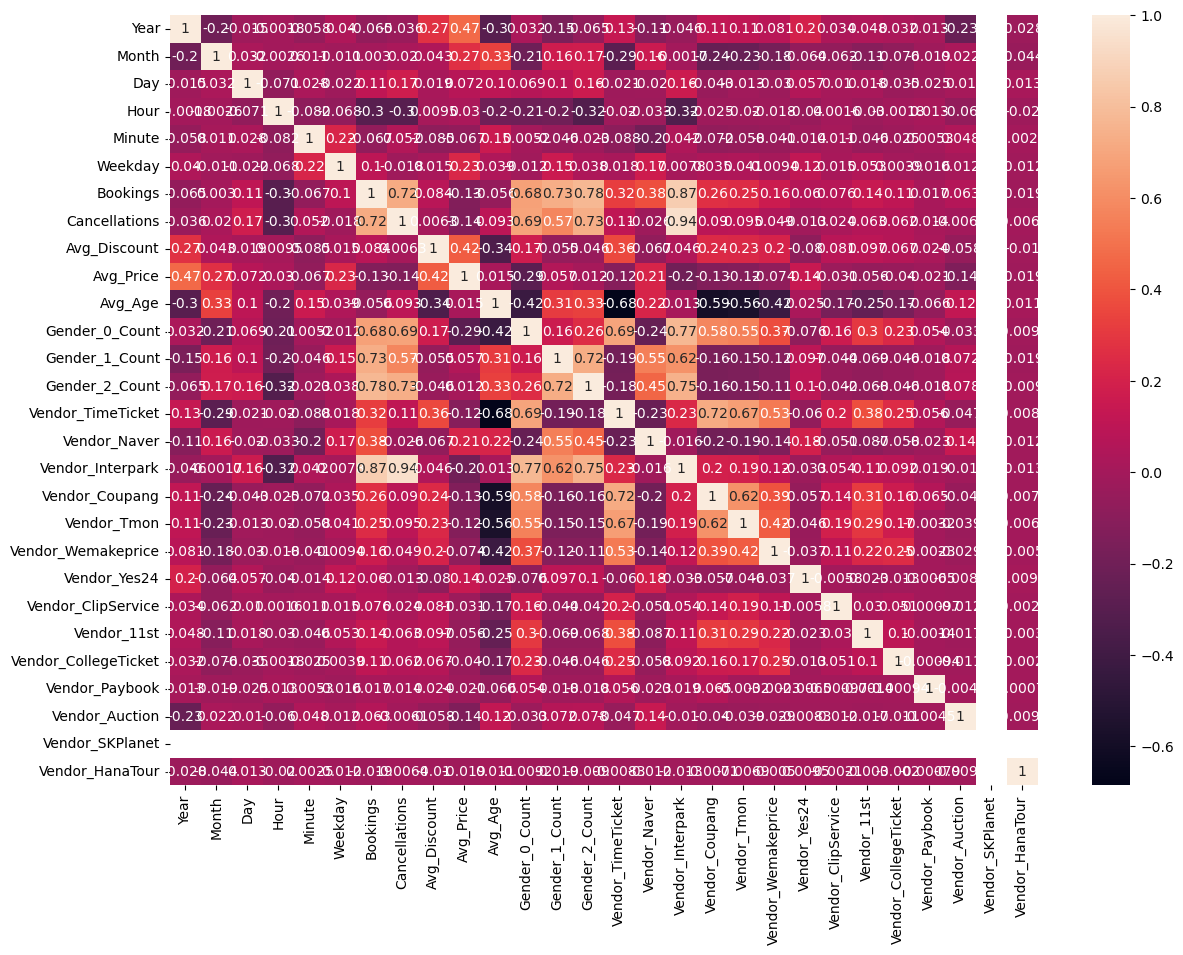

In [105]:
fig = plt.figure(figsize =(14, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [110]:
df_s.corr().loc[:, 'Cancellations'].abs().sort_values(ascending = False) #절대값!

Cancellations           1.000000
Vendor_Interpark        0.942074
Gender_2_Count          0.733175
Bookings                0.723213
Gender_0_Count          0.686185
Gender_1_Count          0.574904
Hour                    0.298448
Day                     0.172586
Avg_Price               0.136373
Vendor_TimeTicket       0.110333
Vendor_Tmon             0.095068
Avg_Age                 0.093422
Vendor_Coupang          0.089762
Vendor_11st             0.062659
Vendor_CollegeTicket    0.062397
Minute                  0.052220
Vendor_Wemakeprice      0.048680
Year                    0.036489
Vendor_Naver            0.026130
Vendor_ClipService      0.024044
Month                   0.019606
Weekday                 0.018377
Vendor_Paybook          0.013960
Vendor_Yes24            0.013280
Vendor_HanaTour         0.006391
Avg_Discount            0.006327
Vendor_Auction          0.006125
Vendor_SKPlanet              NaN
Name: Cancellations, dtype: float64

In [112]:
df_reg = df_s.loc[:, ['Cancellations', 'Vendor_Interpark', 'Gender_2_Count', 'Gender_0_Count', 'Gender_1_Count',
                      'Hour', 'Day', 'Vendor_TimeTicket', 'Vendor_Tmon', 'Avg_Price', 'Avg_Age']].copy()

df_reg.head()

Cancellations  Vendor_Interpark  Gender_2_Count  Gender_0_Count  \
0       0.009146          0.025915        0.050000        0.015083   
1       0.010671          0.035061        0.037037        0.028658   
2       0.012195          0.028201        0.061111        0.015083   
3       0.012195          0.015244        0.038889        0.009050   
4       0.000000          0.011433        0.053704        0.003017   

   Gender_1_Count      Hour       Day  Vendor_TimeTicket  Vendor_Tmon  \
0        0.059783  0.285714  0.000000                0.0          0.0   
1        0.125000  0.428571  0.000000                0.0          0.0   
2        0.105978  0.571429  0.000000                0.0          0.0   
3        0.092391  0.785714  0.000000                0.0          0.0   
4        0.062500  0.285714  0.033333                0.0          0.0   

   Avg_Price   Avg_Age  
0   0.127119  0.498459  
1   0.160588  0.416399  
2   0.192073  0.444937  
3   0.201639  0.514655  
4   0.216667  0.513468

In [115]:
plt.figure(figsize = (18, 20))

for index, col_names in enumerate(df_reg.columns[1:]):
  ax1 = plt.subplot(4, 3, index + 1)
  sns.regplot(x = col_names,
              y = df_reg.columns[0],
              data = df_reg,
              ax = ax1)

plt.show()

In [106]:
from sklearn.model_selection import train_test_split

X = df_s.drop(columns=['Cancellations', 'Bookings'])
y = df_s['Cancellations']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (3942, 26) (3942,)
Test Data :  (986, 26) (986,)


In [107]:
%%time

from sklearn.linear_model import LinearRegression

# Linear Regression 모델 생성
LR = LinearRegression(n_jobs=-1)

# 모델 학습
LR.fit(X_train, y_train)

CPU times: user 49.9 ms, sys: 16.7 ms, total: 66.6 ms
Wall time: 15.8 ms


LinearRegression(n_jobs=-1)

In [108]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, LR.predict(X_test)))

0.01699450739399709

In [109]:
from sklearn.metrics import r2_score

r2_score(y_test, LR.predict(X_test))

0.9092328852365196

### 다시, Vendor가 왜?

In [108]:
# # 메모리 보존
# %reset -f

In [109]:
import os
import dask.dataframe as dd
import time
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from scipy import stats
import matplotlib.pyplot as plt

In [110]:
# 폴더 경로 설정
folder_path = "/Users/myungjunlee/Desktop/repository/Kopis"

# 폴더 내 모든 CSV 파일 불러오기
all_files = glob.glob(f"{folder_path}/**/*.csv", recursive=True)

include_columns = ['공연코드', '공연일시', '예매/취소구분', '할인금액', '장당금액', '성별', '연령']

def read_csv_file(file_path):
    df = dd.read_csv(file_path, usecols=include_columns)
    return df

start_time = time.time()

# 모든 파일의 데이터를 읽어서 하나의 Dask DataFrame으로 결합
dfs_s = [read_csv_file(file) for file in all_files]
dask_df = dd.concat(dfs_s)

# 결과 확인 (예시로 첫 번째 데이터프레임 출력)
print(dask_df.head(1))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to process {elapsed_time:.2f} seconds")

       공연코드              공연일시  예매/취소구분   할인금액   장당금액  성별    연령
0  PF307520  2023-12-25 10:30        1  24500  50000   1  1981
Time taken to process 232.45 seconds


In [111]:
df_a = dask_df.compute()
df_a.head()
del dask_df

In [112]:
df_a['공연일시'] = pd.to_datetime(df_a['공연일시'])

df_a['Year'] = df_a['공연일시'].dt.year
df_a['Month'] = df_a['공연일시'].dt.month
df_a['Day'] = df_a['공연일시'].dt.day
df_a['Hour'] = df_a['공연일시'].dt.hour
df_a['Minute'] = df_a['공연일시'].dt.minute
df_a['Weekday'] = df_a['공연일시'].dt.weekday
df_a.drop(columns = ['공연일시'], inplace=True)

df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137552442 entries, 0 to 99030
Data columns (total 12 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   공연코드     object
 1   예매/취소구분  int64 
 2   할인금액     int64 
 3   장당금액     int64 
 4   성별       int64 
 5   연령       int64 
 6   Year     int32 
 7   Month    int32 
 8   Day      int32 
 9   Hour     int32 
 10  Minute   int32 
 11  Weekday  int32 
dtypes: int32(6), int64(5), object(1)
memory usage: 10.2+ GB


In [113]:
df_343804_c = df_a[df_a['공연코드'] == 'PF343804']
df_343804_c = df_343804_c.drop(columns=['공연코드']).reset_index(drop=True)
df_343804_c.head()

예매/취소구분   할인금액   장당금액  성별  연령  Year  Month  Day  Hour  Minute  Weekday
0        1  20000  40000   0   0  2023     12   25    11      45        0
1        1  20000  40000   0   0  2023     12   25    11      45        0
2        1  20000  40000   0   0  2023     12   25    11      45        0
3        1  20000  40000   0   0  2023     12   25    11      45        0
4        1  20000  40000   0   0  2023     12   25    11      45        0

In [114]:
del df_a

In [115]:
df_343804_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374812 entries, 0 to 1374811
Data columns (total 11 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   예매/취소구분  1374812 non-null  int64
 1   할인금액     1374812 non-null  int64
 2   장당금액     1374812 non-null  int64
 3   성별       1374812 non-null  int64
 4   연령       1374812 non-null  int64
 5   Year     1374812 non-null  int32
 6   Month    1374812 non-null  int32
 7   Day      1374812 non-null  int32
 8   Hour     1374812 non-null  int32
 9   Minute   1374812 non-null  int32
 10  Weekday  1374812 non-null  int32
dtypes: int32(6), int64(5)
memory usage: 83.9 MB


In [116]:
current_year = 2024

df_343804_c['연령'] = pd.to_numeric(df_343804_c['연령'], errors='coerce')
df_343804_c['Age'] = current_year - df_343804_c['연령']
df_343804_c = df_343804_c[(df_343804_c['Age'] >= 0) & (df_343804_c['Age'] <= 100)]
df_343804_c = df_343804_c.dropna(subset=['Age'])
df_343804_c = df_343804_c.drop(columns=['연령'])

df_343804_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379250 entries, 48 to 1374797
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   예매/취소구분  379250 non-null  int64
 1   할인금액     379250 non-null  int64
 2   장당금액     379250 non-null  int64
 3   성별       379250 non-null  int64
 4   Year     379250 non-null  int32
 5   Month    379250 non-null  int32
 6   Day      379250 non-null  int32
 7   Hour     379250 non-null  int32
 8   Minute   379250 non-null  int32
 9   Weekday  379250 non-null  int32
 10  Age      379250 non-null  int64
dtypes: int32(6), int64(5)
memory usage: 26.0 MB


In [127]:
def iqr(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lb = max(q1 - factor * iqr, 0)
    ub = q3 + factor * iqr
    return lb, ub

d_n_z = df_343804_c['할인금액'][df_343804_c['할인금액'] > 0]

d_l, d_u = iqr(d_n_z, factor=4)
p_l, p_u = iqr(df_343804_c['장당금액'], factor=4)
a_l, a_u = iqr(df_343804_c['Age'], factor=4)

print(d_l, d_u, p_l, p_u, a_l, a_u)

0 48000.0 0 75000.0 0 94.0


In [129]:
df_343804_c = df_343804_c[
    (df_343804_c['할인금액'] >= d_l) & (df_343804_c['할인금액'] <= d_u) &
    (df_343804_c['장당금액'] >= p_l) & (df_343804_c['장당금액'] <= p_u) &
    (df_343804_c['Age'] >= a_l) & (df_343804_c['Age'] <= a_u)
].reset_index(drop=True)

df_343804_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379234 entries, 0 to 379233
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   예매/취소구분  379234 non-null  int64
 1   할인금액     379234 non-null  int64
 2   장당금액     379234 non-null  int64
 3   성별       379234 non-null  int64
 4   Year     379234 non-null  int32
 5   Month    379234 non-null  int32
 6   Day      379234 non-null  int32
 7   Hour     379234 non-null  int32
 8   Minute   379234 non-null  int32
 9   Weekday  379234 non-null  int32
 10  Age      379234 non-null  int64
dtypes: int32(6), int64(5)
memory usage: 23.1 MB


In [131]:
df_g = df_343804_c.groupby(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday']).agg(
    Bookings=('예매/취소구분', lambda x: (x == 1).sum()),
    Cancellations=('예매/취소구분', lambda x: (x == 2).sum()),
    Avg_Discount=('할인금액', 'mean'),
    Avg_Price=('장당금액', 'mean'),
    Avg_Age=('Age', 'mean'),
    Gender_0_Count=('성별', lambda x: (x == 0).sum()),
    Gender_1_Count=('성별', lambda x: (x == 1).sum()),
    Gender_2_Count=('성별', lambda x: (x == 2).sum()),
).reset_index()

df_g.head(10)

Year  Month  Day  Hour  Minute  Weekday  Bookings  Cancellations  \
0  2019      7    1    13       0        0        53              6   
1  2019      7    1    15      15        0        78              7   
2  2019      7    1    17      30        0        74              8   
3  2019      7    1    20       0        0        53              8   
4  2019      7    2    13       0        1        54              0   
5  2019      7    2    15      15        1        59             10   
6  2019      7    2    17      30        1        61              8   
7  2019      7    2    20       0        1        31              4   
8  2019      7    3    13       0        2        43              2   
9  2019      7    3    15      15        2        55              6   

   Avg_Discount    Avg_Price    Avg_Age  Gender_0_Count  Gender_1_Count  \
0           0.0  5084.745763  34.898305              10              22   
1           0.0  6423.529412  29.482353              19              46   
2           0.0  7682.926829  31.365854              10              39   
3           0.0  8065.573770  35.967213               6              34   
4           0.0  8666.666667  35.888889               2              23   
5           0.0  7710.144928  28.014493              11              25   
6           0.0  7304.347826  30.565217               6              33   
7           0.0  8914.285714  32.885714               4              13   
8           0.0  8577.777778  36.488889               2              15   
9           0.0  8950.819672  35.901639               4              31   

   Gender_2_Count  
0              27  
1              20  
2              33  
3              21  
4              29  
5              33  
6              30  
7              18  
8              28  
9              26

In [132]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4928 non-null   int32  
 1   Month           4928 non-null   int32  
 2   Day             4928 non-null   int32  
 3   Hour            4928 non-null   int32  
 4   Minute          4928 non-null   int32  
 5   Weekday         4928 non-null   int32  
 6   Bookings        4928 non-null   int64  
 7   Cancellations   4928 non-null   int64  
 8   Avg_Discount    4928 non-null   float64
 9   Avg_Price       4928 non-null   float64
 10  Avg_Age         4928 non-null   float64
 11  Gender_0_Count  4928 non-null   int64  
 12  Gender_1_Count  4928 non-null   int64  
 13  Gender_2_Count  4928 non-null   int64  
dtypes: float64(3), int32(6), int64(5)
memory usage: 423.6 KB


In [133]:
df_g.drop(columns=['Bookings'], inplace=True)

In [134]:
df_g['Cancellations'] = df_g['Cancellations'].astype('float64')
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4928 non-null   int32  
 1   Month           4928 non-null   int32  
 2   Day             4928 non-null   int32  
 3   Hour            4928 non-null   int32  
 4   Minute          4928 non-null   int32  
 5   Weekday         4928 non-null   int32  
 6   Cancellations   4928 non-null   float64
 7   Avg_Discount    4928 non-null   float64
 8   Avg_Price       4928 non-null   float64
 9   Avg_Age         4928 non-null   float64
 10  Gender_0_Count  4928 non-null   int64  
 11  Gender_1_Count  4928 non-null   int64  
 12  Gender_2_Count  4928 non-null   int64  
dtypes: float64(4), int32(6), int64(3)
memory usage: 385.1 KB


### Data Scaling

In [135]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [136]:
df_s = mms.fit_transform(df_g)
df_s = pd.DataFrame(df_s, columns=df_g.columns)
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4928 non-null   float64
 1   Month           4928 non-null   float64
 2   Day             4928 non-null   float64
 3   Hour            4928 non-null   float64
 4   Minute          4928 non-null   float64
 5   Weekday         4928 non-null   float64
 6   Cancellations   4928 non-null   float64
 7   Avg_Discount    4928 non-null   float64
 8   Avg_Price       4928 non-null   float64
 9   Avg_Age         4928 non-null   float64
 10  Gender_0_Count  4928 non-null   float64
 11  Gender_1_Count  4928 non-null   float64
 12  Gender_2_Count  4928 non-null   float64
dtypes: float64(13)
memory usage: 500.6 KB


In [229]:
df_s.tail(5)

Year  Month    Day   Hour  Minute  Weekday  Cancellations  \
4923 1.0000 1.0000 0.9667 0.7857  0.6000   0.8333         0.0061   
4924 1.0000 1.0000 1.0000 0.2143  0.9000   1.0000         0.0061   
4925 1.0000 1.0000 1.0000 0.4286  0.0000   1.0000         0.0091   
4926 1.0000 1.0000 1.0000 0.5714  0.3000   1.0000         0.0198   
4927 1.0000 1.0000 1.0000 0.7143  0.6000   1.0000         0.0122   

      Avg_Discount  Avg_Price  Avg_Age  Gender_0_Count  Gender_1_Count  \
4923        0.4501     0.6250   0.3496          0.0000          0.0299   
4924        0.3077     0.5981   0.5769          0.0000          0.0353   
4925        0.4937     0.7227   0.4478          0.0000          0.1359   
4926        0.6546     0.8130   0.3850          0.0000          0.1141   
4927        0.4876     0.7949   0.4286          0.0121          0.0679   

      Gender_2_Count  
4923          0.0296  
4924          0.0481  
4925          0.1444  
4926          0.1111  
4927          0.0481

### Box Plot

In [138]:
fig = plt.figure(figsize =(10, 7))
boxplot = df_s.boxplot(column = list(df_s.columns))
plt.xticks(rotation=90)
plt.show()

### Scatter Plot

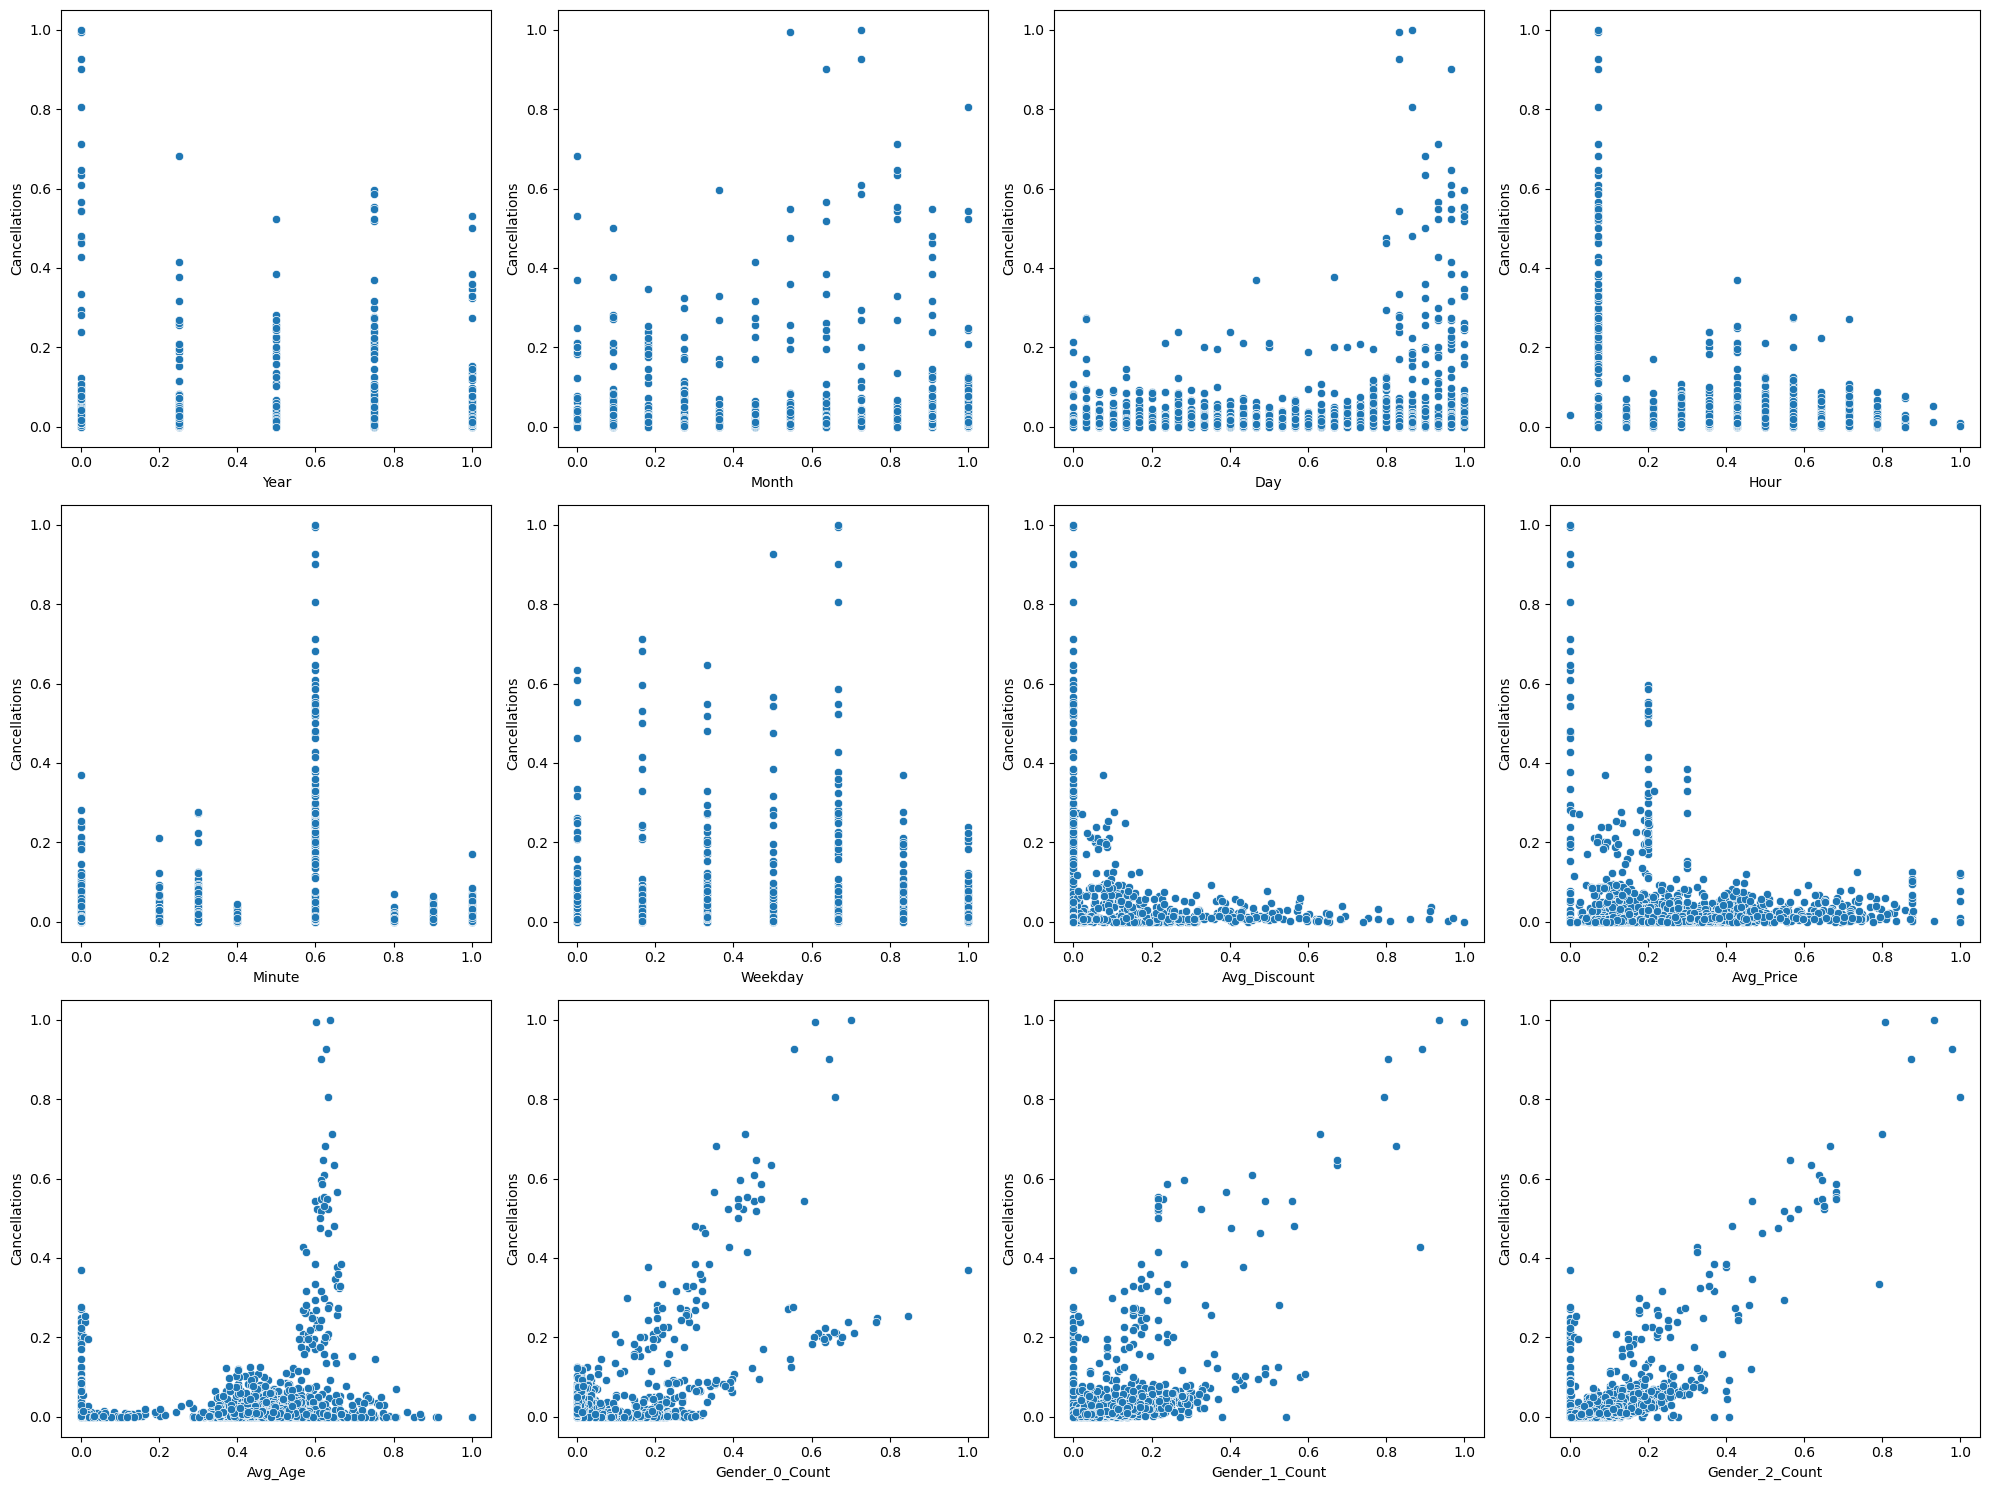

In [139]:
columns_to_plot = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday', 'Avg_Discount', 'Avg_Price', 'Avg_Age', 'Gender_0_Count', 
                   'Gender_1_Count', 'Gender_2_Count']

plt.figure(figsize=(20, 15))

for index, col_name in enumerate(columns_to_plot):
    ax = plt.subplot(3, 4, index + 1)
    sns.scatterplot(x=df_s[col_name], y=df_s['Cancellations'], ax=ax)
    ax.set(xlabel=col_name, ylabel='Cancellations')

plt.tight_layout()
plt.show()

### Corrlation

In [140]:
corrMatrix = df_s.corr()
print (corrMatrix)

                    Year     Month       Day      Hour    Minute   Weekday  \
Year            1.000000 -0.204341 -0.015167 -0.001820 -0.057961  0.039981   
Month          -0.204341  1.000000  0.031757 -0.002641  0.010930 -0.011344   
Day            -0.015167  0.031757  1.000000 -0.071259  0.027974 -0.022145   
Hour           -0.001820 -0.002641 -0.071259  1.000000 -0.081954 -0.067966   
Minute         -0.057961  0.010930  0.027974 -0.081954  1.000000  0.222811   
Weekday         0.039981 -0.011344 -0.022145 -0.067966  0.222811  1.000000   
Cancellations  -0.036464  0.019654  0.172589 -0.298449  0.052253 -0.018414   
Avg_Discount    0.274053  0.043148  0.019009  0.009493 -0.084539  0.015281   
Avg_Price       0.468513  0.265104  0.072097  0.029781 -0.067235  0.227065   
Avg_Age        -0.301761  0.329162  0.102398 -0.200275  0.153807  0.038924   
Gender_0_Count  0.031616 -0.206958  0.068664 -0.206912  0.005164 -0.011815   
Gender_1_Count -0.153792  0.164911  0.102553 -0.196563 -0.045580

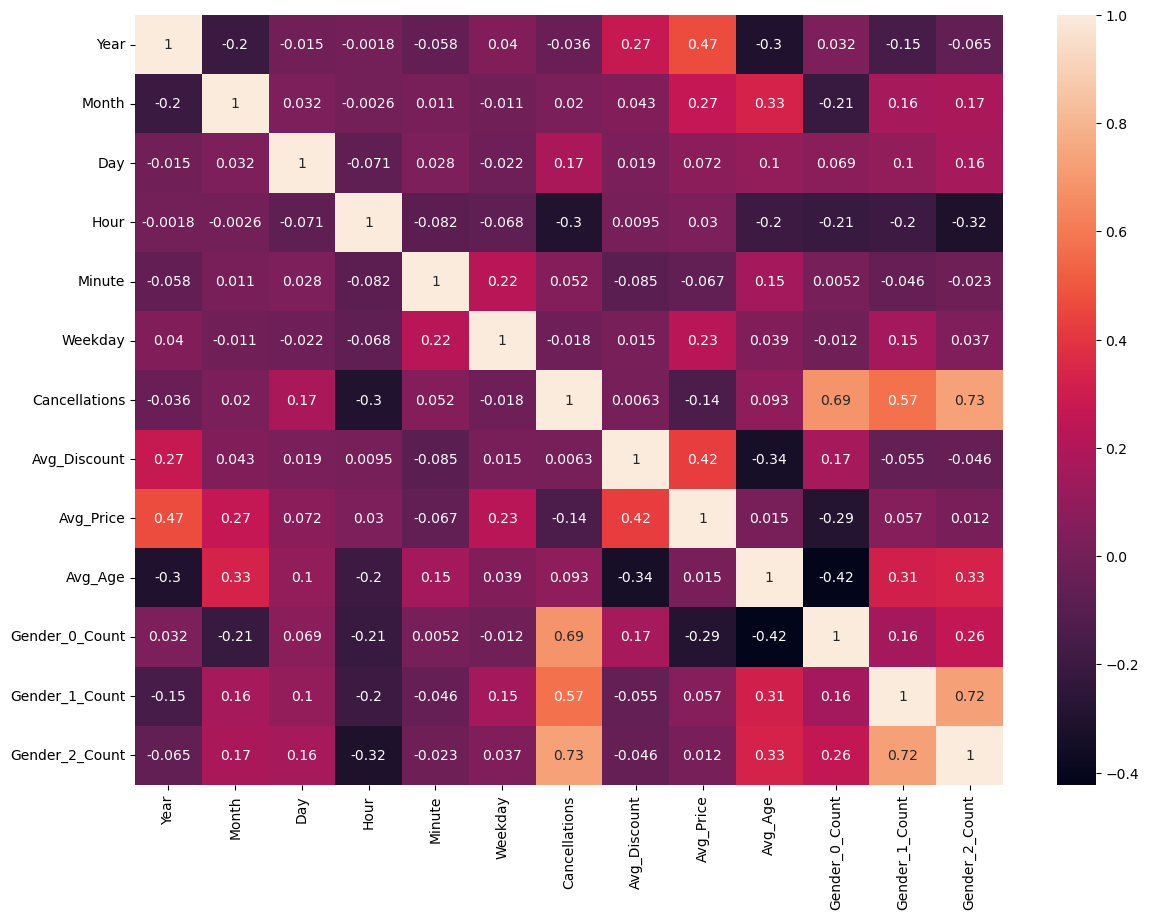

In [141]:
fig = plt.figure(figsize =(14, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [142]:
df_s.corr().loc[:, 'Cancellations'].abs().sort_values(ascending = False) #절대값!

Cancellations     1.000000
Gender_2_Count    0.733175
Gender_0_Count    0.686182
Gender_1_Count    0.574872
Hour              0.298449
Day               0.172589
Avg_Price         0.136337
Avg_Age           0.093434
Minute            0.052253
Year              0.036464
Month             0.019654
Weekday           0.018414
Avg_Discount      0.006335
Name: Cancellations, dtype: float64

In [143]:
df_reg = df_s.loc[:, ['Cancellations', 'Gender_0_Count', 'Gender_2_Count', 'Gender_1_Count', 'Avg_Price', 'Avg_Age',
                      'Hour', 'Avg_Discount', 'Month']].copy()

df_reg.head()

Cancellations  Gender_0_Count  Gender_2_Count  Gender_1_Count  Avg_Price  \
0       0.009146        0.015083        0.050000        0.059783   0.127119   
1       0.010671        0.028658        0.037037        0.125000   0.160588   
2       0.012195        0.015083        0.061111        0.105978   0.192073   
3       0.012195        0.009050        0.038889        0.092391   0.201639   
4       0.000000        0.003017        0.053704        0.062500   0.216667   

    Avg_Age      Hour  Avg_Discount     Month  
0  0.498459  0.285714           0.0  0.545455  
1  0.416399  0.428571           0.0  0.545455  
2  0.444937  0.571429           0.0  0.545455  
3  0.514655  0.785714           0.0  0.545455  
4  0.513468  0.285714           0.0  0.545455

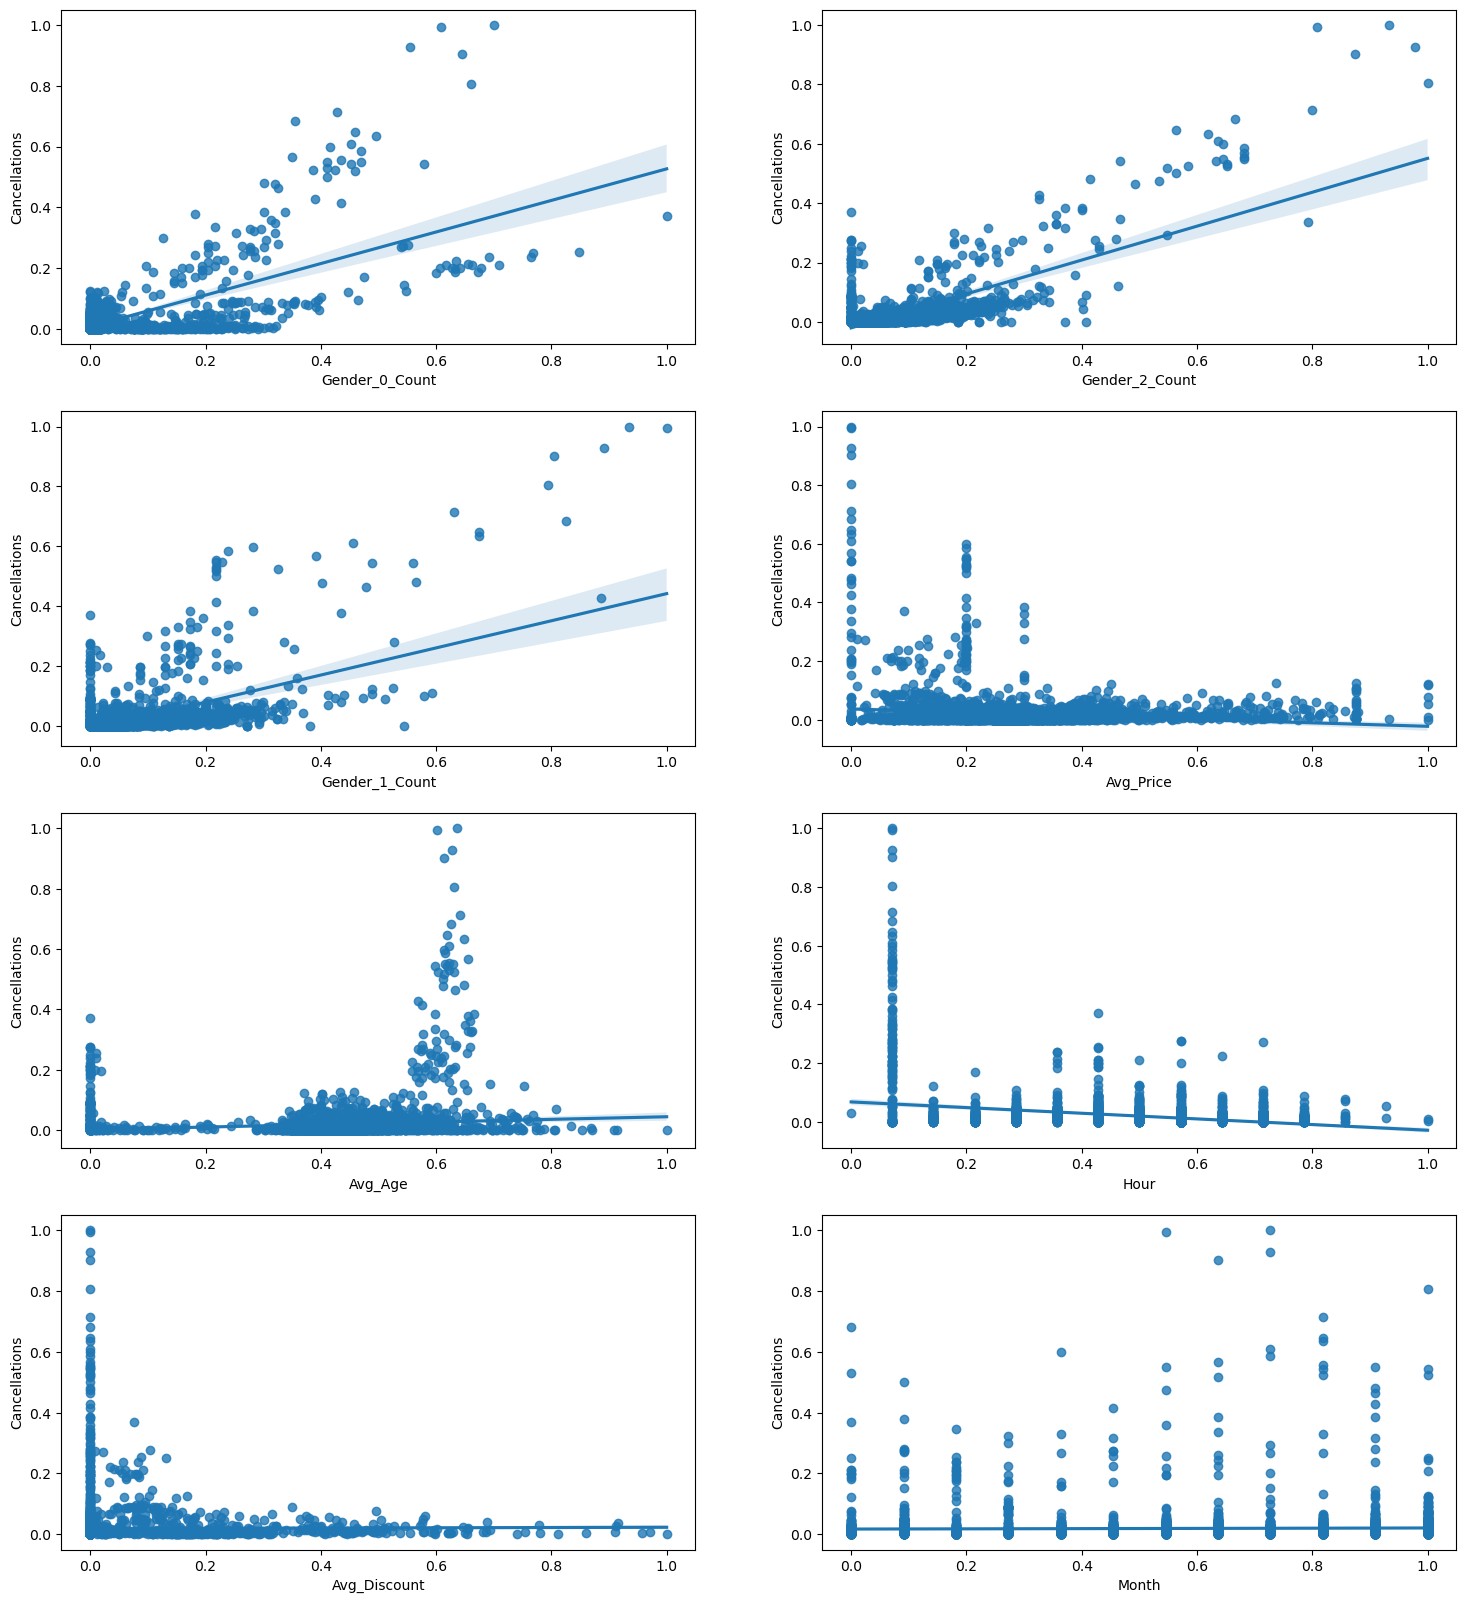

In [144]:
plt.figure(figsize = (18, 20))

for index, col_names in enumerate(df_reg.columns[1:]):
  ax1 = plt.subplot(4, 2, index + 1)
  sns.regplot(x = col_names,
              y = df_reg.columns[0],
              data = df_reg,
              ax = ax1)

plt.show()

## Regression

In [221]:
from sklearn.model_selection import train_test_split

X = df_s.drop(columns=['Cancellations'])
y = df_g['Cancellations']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (3942, 12) (3942,)
Test Data :  (986, 12) (986,)


In [222]:
# mms = MinMaxScaler()

# X_train_scaled = mms.fit_transform(X_train)
# X_test_scaled = mms.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [223]:
%%time

from sklearn.linear_model import LinearRegression

# Linear Regression 모델 생성
LR_c = LinearRegression(n_jobs=-1)

# 모델 학습
LR_c.fit(X_train_scaled, y_train)

CPU times: user 7.01 ms, sys: 2.64 ms, total: 9.66 ms
Wall time: 6.49 ms


LinearRegression(n_jobs=-1)

In [224]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, LR_c.predict(X_test)))

15.4295780431891

In [225]:
from sklearn.metrics import r2_score

r2_score(y_test, LR_c.predict(X_test))

0.826135150207311

### Decision Tree

In [149]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(X_train, y_train)

DecisionTreeRegressor()

### Evaluation

In [150]:
np.sqrt(mean_squared_error(y_test, DT.predict(X_test)))

12.054389923592993

In [151]:
r2_score(y_test, DT.predict(X_test))

0.8938807524884058

### Feature Importance

In [152]:
plt.figure(figsize=(12, 6))
sns.barplot(x=DT.feature_importances_, y=X_train.columns)
plt.show()

### RandomForest

In [153]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF.fit(X_train, y_train)

RandomForestRegressor()

### Evaluation

In [154]:
np.sqrt(mean_squared_error(y_test, RF.predict(X_test)))

8.763855000082707

In [155]:
r2_score(y_test, RF.predict(X_test))

0.943908887001008

### Feature Importance

In [156]:
plt.figure(figsize = (12, 6))
sns.barplot(x = RF.feature_importances_, y = X_train.columns)
plt.show()

### XGBoost

In [157]:
from xgboost import XGBRegressor

XB = XGBRegressor()

XB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation

In [158]:
np.sqrt(mean_squared_error(y_test, XB.predict(X_test)))

8.56209553000345

In [159]:
r2_score(y_test, XB.predict(X_test))

0.9464617922094178

### Feature Importance

In [160]:
plt.figure(figsize = (12, 6))
sns.barplot(x = XB.feature_importances_, y = X_train.columns)
plt.show()

### 예시를 하나

In [165]:
X.head(1) #훈련에 사용된 데이터

Year     Month  Day      Hour  Minute  Weekday  Avg_Discount  Avg_Price  \
0   0.0  0.545455  0.0  0.285714     0.0      0.0           0.0   0.127119   

    Avg_Age  Gender_0_Count  Gender_1_Count  Gender_2_Count  
0  0.498459        0.015083        0.059783            0.05

In [230]:
test_array = X.head(1)

mms = MinMaxScaler()
mms.fit(X)

test_df_s = mms.transform(test_array)
predicted_value = XB.predict(test_df_s)

predicted_value[0]

5.4241877

### 다시

In [1]:
# # 메모리 보존
# %reset -f

In [2]:
import os
import dask.dataframe as dd
import time
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from scipy import stats
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.Tensor size changed, may indicate binary incompatibility. Expected 64 from C header, got 80 from PyObject


In [3]:
# 폴더 경로 설정
folder_path = "/Users/myungjunlee/Desktop/repository/Kopis"

# 폴더 내 모든 CSV 파일 불러오기
all_files = glob.glob(f"{folder_path}/**/*.csv", recursive=True)

include_columns = ['공연코드', '공연일시', '예매/취소구분', '할인금액', '장당금액', '성별', '연령']

def read_csv_file(file_path):
    df = dd.read_csv(file_path, usecols=include_columns)
    return df

start_time = time.time()

# 모든 파일의 데이터를 읽어서 하나의 Dask DataFrame으로 결합
dfs_s = [read_csv_file(file) for file in all_files]
dask_df = dd.concat(dfs_s)

# 결과 확인 (예시로 첫 번째 데이터프레임 출력)
print(dask_df.head(1))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to process {elapsed_time:.2f} seconds")

       공연코드              공연일시  예매/취소구분   할인금액   장당금액  성별    연령
0  PF307520  2023-12-25 10:30        1  24500  50000   1  1981
Time taken to process 237.06 seconds


In [4]:
df_a = dask_df.compute()
df_a.head()
del dask_df

In [5]:
df_a['공연일시'] = pd.to_datetime(df_a['공연일시'])

df_a['Year'] = df_a['공연일시'].dt.year
df_a['Month'] = df_a['공연일시'].dt.month
df_a['Day'] = df_a['공연일시'].dt.day
df_a['Hour'] = df_a['공연일시'].dt.hour
df_a['Minute'] = df_a['공연일시'].dt.minute
df_a['Weekday'] = df_a['공연일시'].dt.weekday
df_a.drop(columns = ['공연일시'], inplace=True)

df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137552442 entries, 0 to 99030
Data columns (total 12 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   공연코드     object
 1   예매/취소구분  int64 
 2   할인금액     int64 
 3   장당금액     int64 
 4   성별       int64 
 5   연령       int64 
 6   Year     int32 
 7   Month    int32 
 8   Day      int32 
 9   Hour     int32 
 10  Minute   int32 
 11  Weekday  int32 
dtypes: int32(6), int64(5), object(1)
memory usage: 10.2+ GB


In [6]:
df_343804_d = df_a[df_a['공연코드'] == 'PF343804']
df_343804_d = df_343804_d.drop(columns=['공연코드']).reset_index(drop=True)
df_343804_d.head()

예매/취소구분   할인금액   장당금액  성별  연령  Year  Month  Day  Hour  Minute  Weekday
0        1  20000  40000   0   0  2023     12   25    11      45        0
1        1  20000  40000   0   0  2023     12   25    11      45        0
2        1  20000  40000   0   0  2023     12   25    11      45        0
3        1  20000  40000   0   0  2023     12   25    11      45        0
4        1  20000  40000   0   0  2023     12   25    11      45        0

In [7]:
del df_a

In [9]:
current_year = 2024

df_343804_d['연령'] = pd.to_numeric(df_343804_d['연령'], errors='coerce')
df_343804_d['Age'] = current_year - df_343804_d['연령']
df_343804_d = df_343804_d[(df_343804_d['Age'] >= 0) & (df_343804_d['Age'] <= 100)]
df_343804_d = df_343804_d.dropna(subset=['Age'])
df_343804_d = df_343804_d.drop(columns=['연령'])

df_343804_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379250 entries, 48 to 1374797
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   예매/취소구분  379250 non-null  int64
 1   할인금액     379250 non-null  int64
 2   장당금액     379250 non-null  int64
 3   성별       379250 non-null  int64
 4   Year     379250 non-null  int32
 5   Month    379250 non-null  int32
 6   Day      379250 non-null  int32
 7   Hour     379250 non-null  int32
 8   Minute   379250 non-null  int32
 9   Weekday  379250 non-null  int32
 10  Age      379250 non-null  int64
dtypes: int32(6), int64(5)
memory usage: 26.0 MB


In [11]:
def iqr(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lb = max(q1 - factor * iqr, 0)
    ub = q3 + factor * iqr
    return lb, ub

d_n_z = df_343804_d['할인금액'][df_343804_d['할인금액'] > 0]

d_l, d_u = iqr(d_n_z, factor=4)
p_l, p_u = iqr(df_343804_d['장당금액'], factor=4)
a_l, a_u = iqr(df_343804_d['Age'], factor=4)

print(d_l, d_u, p_l, p_u, a_l, a_u)

0 48000.0 0 75000.0 0 94.0


In [13]:
df_343804_d = df_343804_d[
    (df_343804_d['할인금액'] >= d_l) & (df_343804_d['할인금액'] <= d_u) &
    (df_343804_d['장당금액'] >= p_l) & (df_343804_d['장당금액'] <= p_u) &
    (df_343804_d['Age'] >= a_l) & (df_343804_d['Age'] <= a_u)
].reset_index(drop=True)

df_343804_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379234 entries, 0 to 379233
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   예매/취소구분  379234 non-null  int64
 1   할인금액     379234 non-null  int64
 2   장당금액     379234 non-null  int64
 3   성별       379234 non-null  int64
 4   Year     379234 non-null  int32
 5   Month    379234 non-null  int32
 6   Day      379234 non-null  int32
 7   Hour     379234 non-null  int32
 8   Minute   379234 non-null  int32
 9   Weekday  379234 non-null  int32
 10  Age      379234 non-null  int64
dtypes: int32(6), int64(5)
memory usage: 23.1 MB


In [14]:
df_g = df_343804_d.groupby(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday']).agg(
    Bookings=('예매/취소구분', lambda x: (x == 1).sum()),
    Cancellations=('예매/취소구분', lambda x: (x == 2).sum()),
    Avg_Discount=('할인금액', 'mean'),
    Avg_Price=('장당금액', 'mean'),
    Avg_Age=('Age', 'mean'),
    Gender_0_Count=('성별', lambda x: (x == 0).sum()),
    Gender_1_Count=('성별', lambda x: (x == 1).sum()),
    Gender_2_Count=('성별', lambda x: (x == 2).sum()),
).reset_index()

df_g.head(10)

Year  Month  Day  Hour  Minute  Weekday  Bookings  Cancellations  \
0  2019      7    1    13       0        0        53              6   
1  2019      7    1    15      15        0        78              7   
2  2019      7    1    17      30        0        74              8   
3  2019      7    1    20       0        0        53              8   
4  2019      7    2    13       0        1        54              0   
5  2019      7    2    15      15        1        59             10   
6  2019      7    2    17      30        1        61              8   
7  2019      7    2    20       0        1        31              4   
8  2019      7    3    13       0        2        43              2   
9  2019      7    3    15      15        2        55              6   

   Avg_Discount    Avg_Price    Avg_Age  Gender_0_Count  Gender_1_Count  \
0           0.0  5084.745763  34.898305              10              22   
1           0.0  6423.529412  29.482353              19              46   
2           0.0  7682.926829  31.365854              10              39   
3           0.0  8065.573770  35.967213               6              34   
4           0.0  8666.666667  35.888889               2              23   
5           0.0  7710.144928  28.014493              11              25   
6           0.0  7304.347826  30.565217               6              33   
7           0.0  8914.285714  32.885714               4              13   
8           0.0  8577.777778  36.488889               2              15   
9           0.0  8950.819672  35.901639               4              31   

   Gender_2_Count  
0              27  
1              20  
2              33  
3              21  
4              29  
5              33  
6              30  
7              18  
8              28  
9              26

In [15]:
df_g.drop(columns=['Bookings'], inplace=True)
df_g['Cancellations'] = df_g['Cancellations'].astype('float64')
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4928 non-null   int32  
 1   Month           4928 non-null   int32  
 2   Day             4928 non-null   int32  
 3   Hour            4928 non-null   int32  
 4   Minute          4928 non-null   int32  
 5   Weekday         4928 non-null   int32  
 6   Cancellations   4928 non-null   float64
 7   Avg_Discount    4928 non-null   float64
 8   Avg_Price       4928 non-null   float64
 9   Avg_Age         4928 non-null   float64
 10  Gender_0_Count  4928 non-null   int64  
 11  Gender_1_Count  4928 non-null   int64  
 12  Gender_2_Count  4928 non-null   int64  
dtypes: float64(4), int32(6), int64(3)
memory usage: 385.1 KB


In [16]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [18]:
from sklearn.model_selection import train_test_split

X = df_g.drop(columns=['Cancellations'])
y = df_g['Cancellations']

X = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (3942, 12) (3942,)
Test Data :  (986, 12) (986,)


In [24]:
X_train[0]

array([0.5       , 0.54545455, 0.53333333, 0.21428571, 1.        ,
       0.83333333, 0.        , 0.35862069, 0.53552769, 0.        ,
       0.01086957, 0.0462963 ])

In [20]:
%%time

from sklearn.linear_model import LinearRegression

# Linear Regression 모델 생성
LR_s = LinearRegression(n_jobs=-1)

# 모델 학습
LR_s.fit(X_train, y_train)

CPU times: user 4.17 ms, sys: 2.67 ms, total: 6.83 ms
Wall time: 7.5 ms


LinearRegression(n_jobs=-1)

In [22]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, LR_s.predict(X_test)))

15.429578043189094

In [26]:
from sklearn.metrics import r2_score

r2_score(y_test, LR_s.predict(X_test))

0.8261351502073111

In [27]:
from xgboost import XGBRegressor

XB = XGBRegressor()

XB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
np.sqrt(mean_squared_error(y_test, XB.predict(X_test)))

8.56209553000345

In [29]:
r2_score(y_test, XB.predict(X_test))

0.9464617922094178

In [32]:
X_train[0]

array([0.5       , 0.54545455, 0.53333333, 0.21428571, 1.        ,
       0.83333333, 0.        , 0.35862069, 0.53552769, 0.        ,
       0.01086957, 0.0462963 ])

In [33]:
t_d = [2019, 7, 1, 13, 0, 0, 0.0, 5084.745763, 34.898305, 10, 22, 27]

t_d = mms.transform([t_d])
print(t_d)

predicted_value = XB.predict(t_d)
print(predicted_value[0])

[[0.         0.54545455 0.         0.28571429 0.         0.
  0.         0.12711864 0.49845917 0.01508296 0.05978261 0.05      ]]
5.4241877


/opt/homebrew/anaconda3/envs/gpu/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
